
# Installing numpy,pandas,matplotlib

In [1]:
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install seaborn
!pip  install sklearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
sn.set_style("darkgrid")

# Reading and displaying data

In [3]:
data1=pd.read_csv("Data/diabetes.csv")

In [4]:
display(data1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data1.describe() #Describing data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data1.head() #Displaying first 5 entries

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Displaying which all data is null

In [7]:
data1.isnull() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


## Checking correlation with output feature "Outcome"

In [8]:
print(data1.corr()["Outcome"])

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64


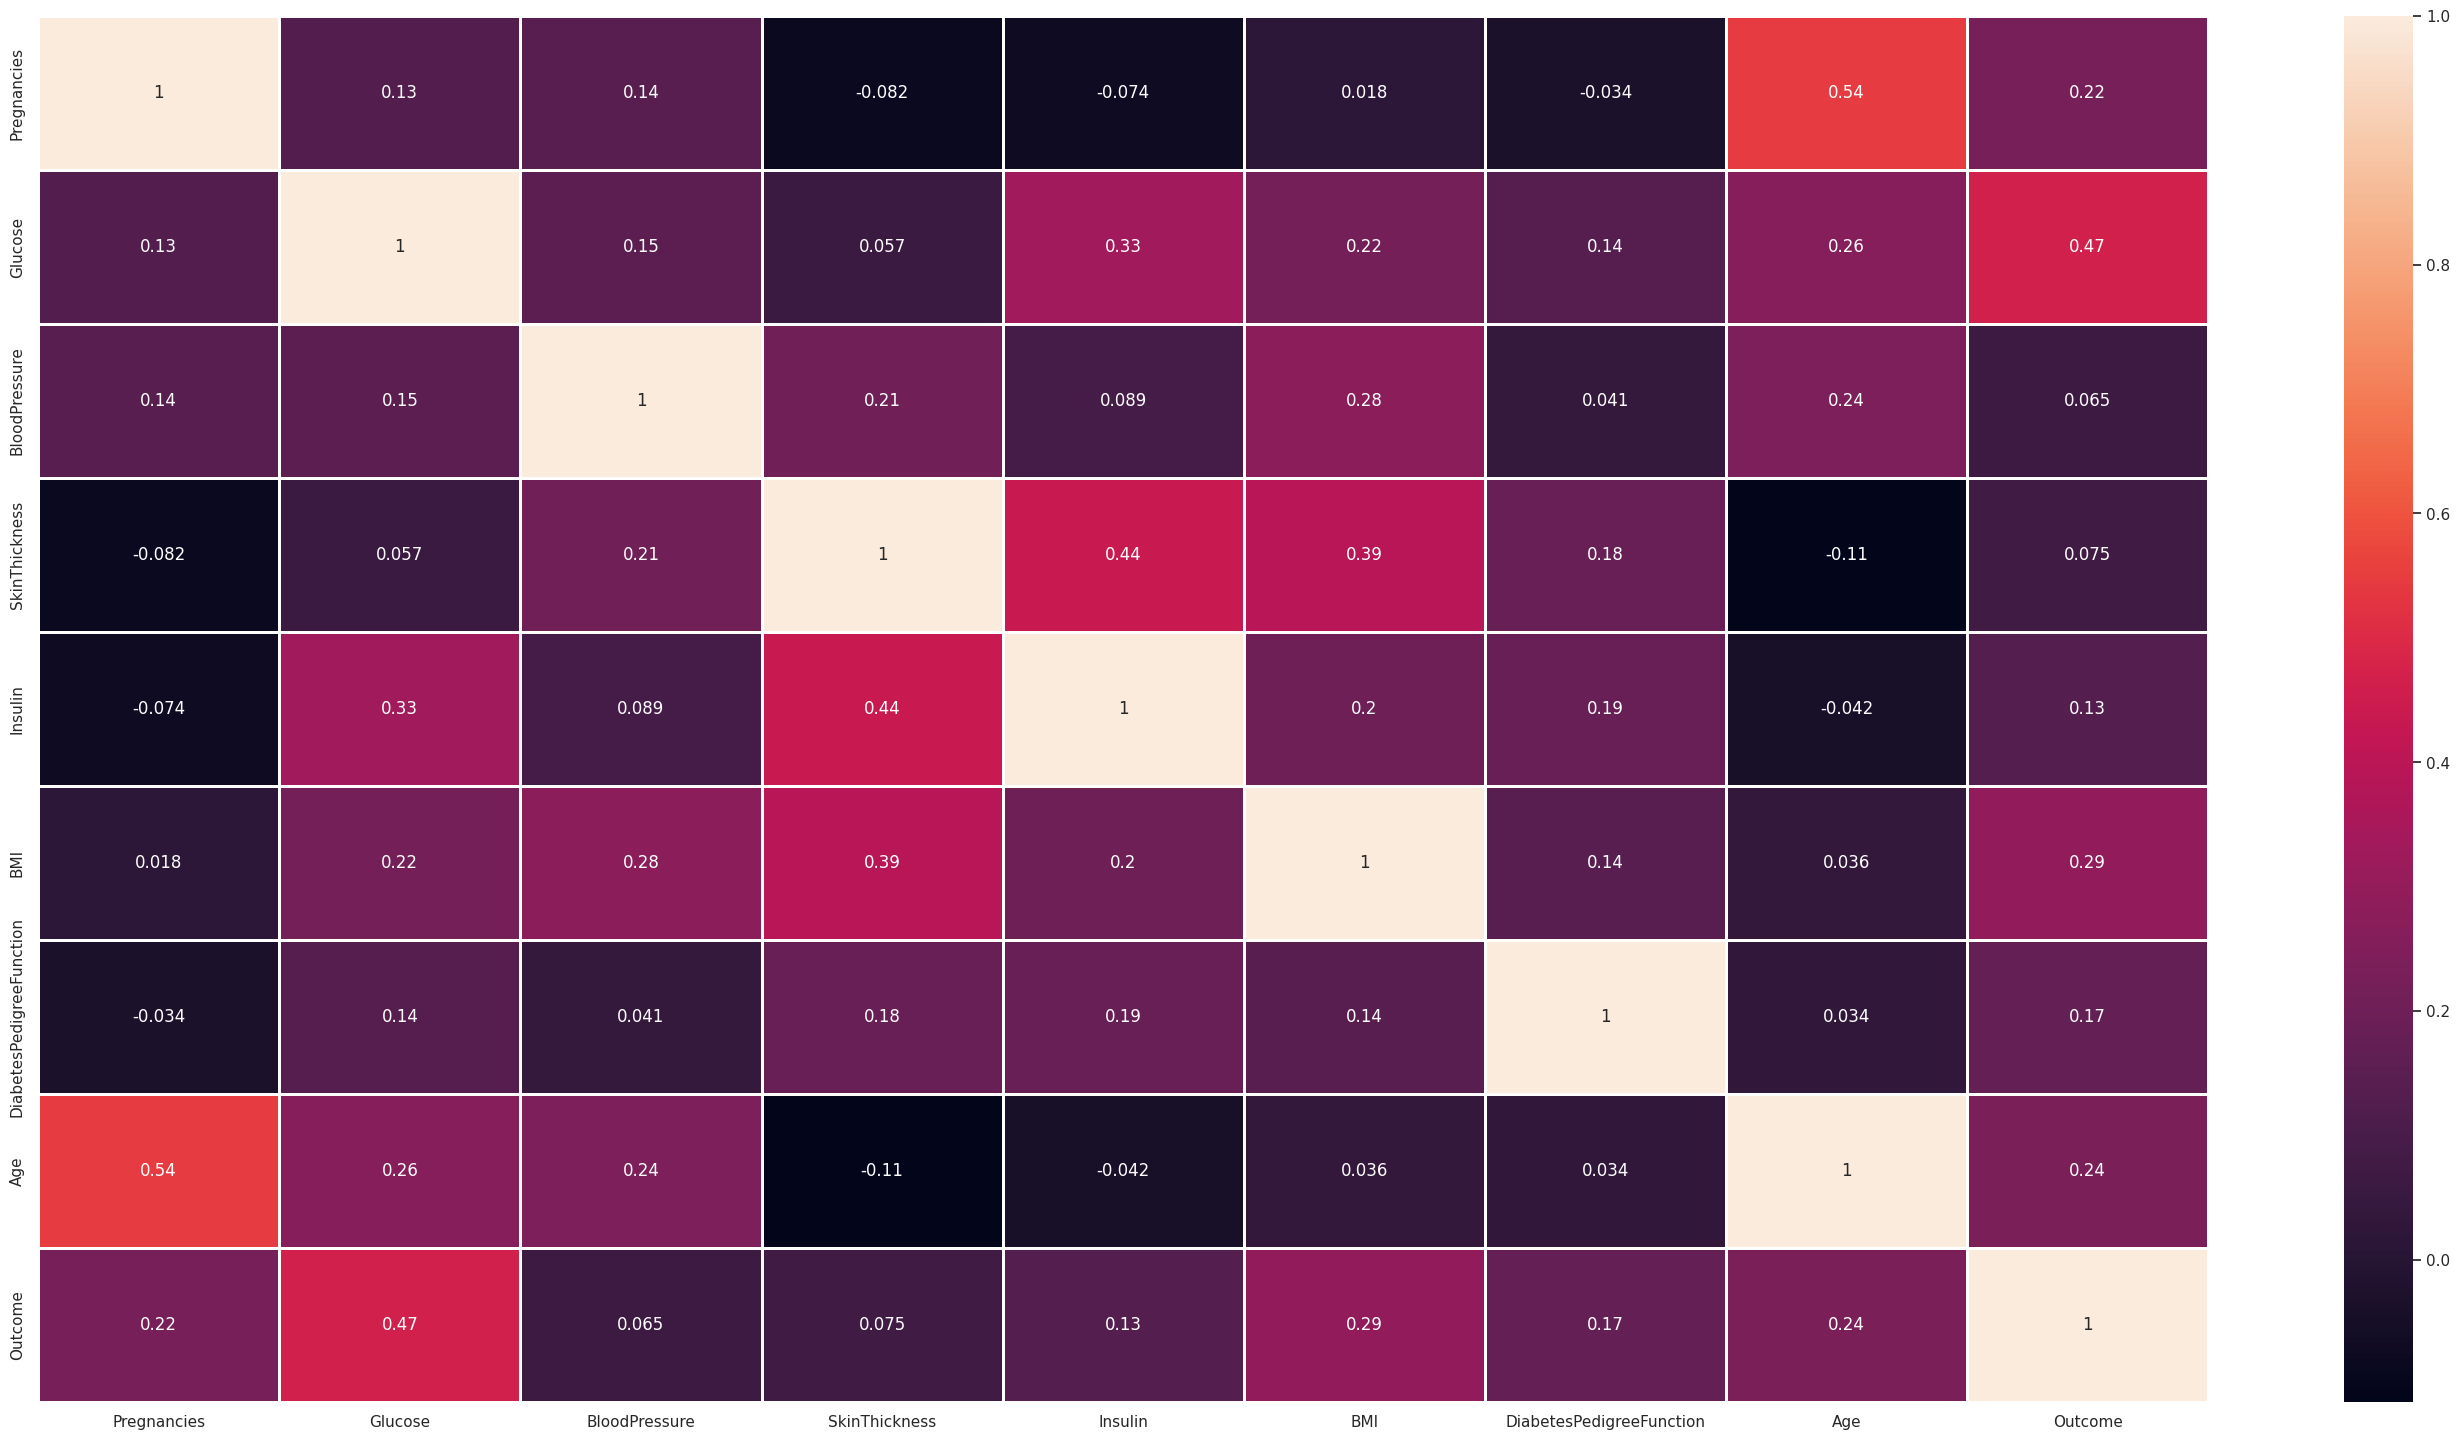

In [9]:
sn.set(rc={'figure.figsize':(35,18)})
mn = sn.heatmap(data=data1.corr(),linewidths=.75,annot=True)
plt.show()

## Function definitions 

In [10]:
def weightInitialization(num_features):
    W=np.zeros((1,num_features))
    b=0
    return W,b

def sigmoidActivation(result):
    sigmoid_Answer=1/(1+np.exp(-result))
    return sigmoid_Answer

def forward(X,Y,W,b):
    m=X.shape[0]
    sigmoid_answer=sigmoidActivation(np.dot(W,X.T)+b)
    cost=(-1/m)*(np.sum((Y.T*np.log(sigmoid_answer))+((1-Y.T)*(np.log(1-sigmoid_answer)))))
    return cost,sigmoid_answer

def gradient(X,Y,sigmoid_answer):
    m=X.shape[0]
    dW = (1/m)*(np.dot(X.T,(sigmoid_answer-Y.T).T))
    db = (1/m)*(np.sum(sigmoid_answer-Y.T))
    grads = {"dW": dW, "db": db}  
#     print(grads)
    return grads

def train(W,b,X,y,learningRate,N):
    costs = []
    for i in range(N):
        cost,sigmoid_answer= forward(X,y,W,b)
        grads=gradient(X,y,sigmoid_answer)
#         print(grads)
        dW = grads["dW"]
        db = grads["db"]
        W=W-(learningRate*(dW.T))
        b=b-(learningRate*db)
        costs.append(cost)
        print("Cost after %i iteration is %f" %(i, cost))
    coef = {"w":W,"b":b}
    grad={"dW":dW,"db": db}
    return coef,grad,costs

def infer(W,b,X):
#     print(W.shape)
#     print(X.shape)
    sigmoid_answer=sigmoidActivation(np.dot(X,W)+b)
#     print(sigmoid_answer)
    return sigmoid_answer

def standardize(df,col_name):
    df[col_name]=(df[col_name]-df[col_name].mean())/df[col_name].std()

def normalize(df,col_name):
    df[col_name]=(df[col_name]-df[col_name].min())/(df[col_name].max()-df[col_name].min())

def accuracy(y_pred,test_data_y):
    a=np.sum(np.equal(test_data_y,y_pred))/len(test_data_y)
    return a
    
def f1_score(y_pred,test_data_y):
    print(len(y_pred))
    

# Data Preprocessing

Here, 0's are replaced with mean values of the columns. The features that can have 0s as valid inputs are spared such as 'Pregnancies'. 

In [11]:
data1_processed=data1.copy()
data1_processed['Insulin'].replace(0,data1_processed[data1_processed['Insulin']!=0]['Insulin'].mean(),inplace=True)
data1_processed['BMI'].replace(0,data1_processed[data1_processed['BMI']!=0]['BMI'].mean())
data1_processed['BloodPressure'].replace(0,data1_processed[data1_processed['BloodPressure']!=0]['BloodPressure'].mean())
data1_processed['SkinThickness'].replace(0,data1_processed[data1_processed['SkinThickness']!=0]['SkinThickness'].mean())
display(data1_processed)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155.548223,33.6,0.627,50,1
1,1,85,66,29,155.548223,26.6,0.351,31,0
2,8,183,64,0,155.548223,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,155.548223,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0
766,1,126,60,0,155.548223,30.1,0.349,47,1


## Standardizing or Normalizing the data

All columns except "Outcome" column are standardized so that data is comparable.
Normalization maps data into the range of 0 and 1 and standardization maps the data into the range of -1 to +1.
Here, Normalization is used instead of standardization as it provides more accuracy and classifies data better.

In [12]:
data1Standardized=data1_processed.copy()
for column in data1Standardized.columns:
    if column!='Outcome':
        #standardize(data1Standardized,column)
        normalize(data1Standardized,column)
display(data1Standardized)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.170130,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.170130,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.170130,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.096154,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.185096,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.199519,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.170130,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.117788,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.170130,0.448584,0.115713,0.433333,1


In [13]:
data1Standardized['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Finding Correlation Matrix

Finding how closely features are related to each other.
More correaltion implies that the feature has huge contribution to the changes in the target variable.

In [14]:
data1_processed_corr=data1_processed.corr()#["Life expectancy "]
print(data1_processed_corr["Outcome"])

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.214411
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64


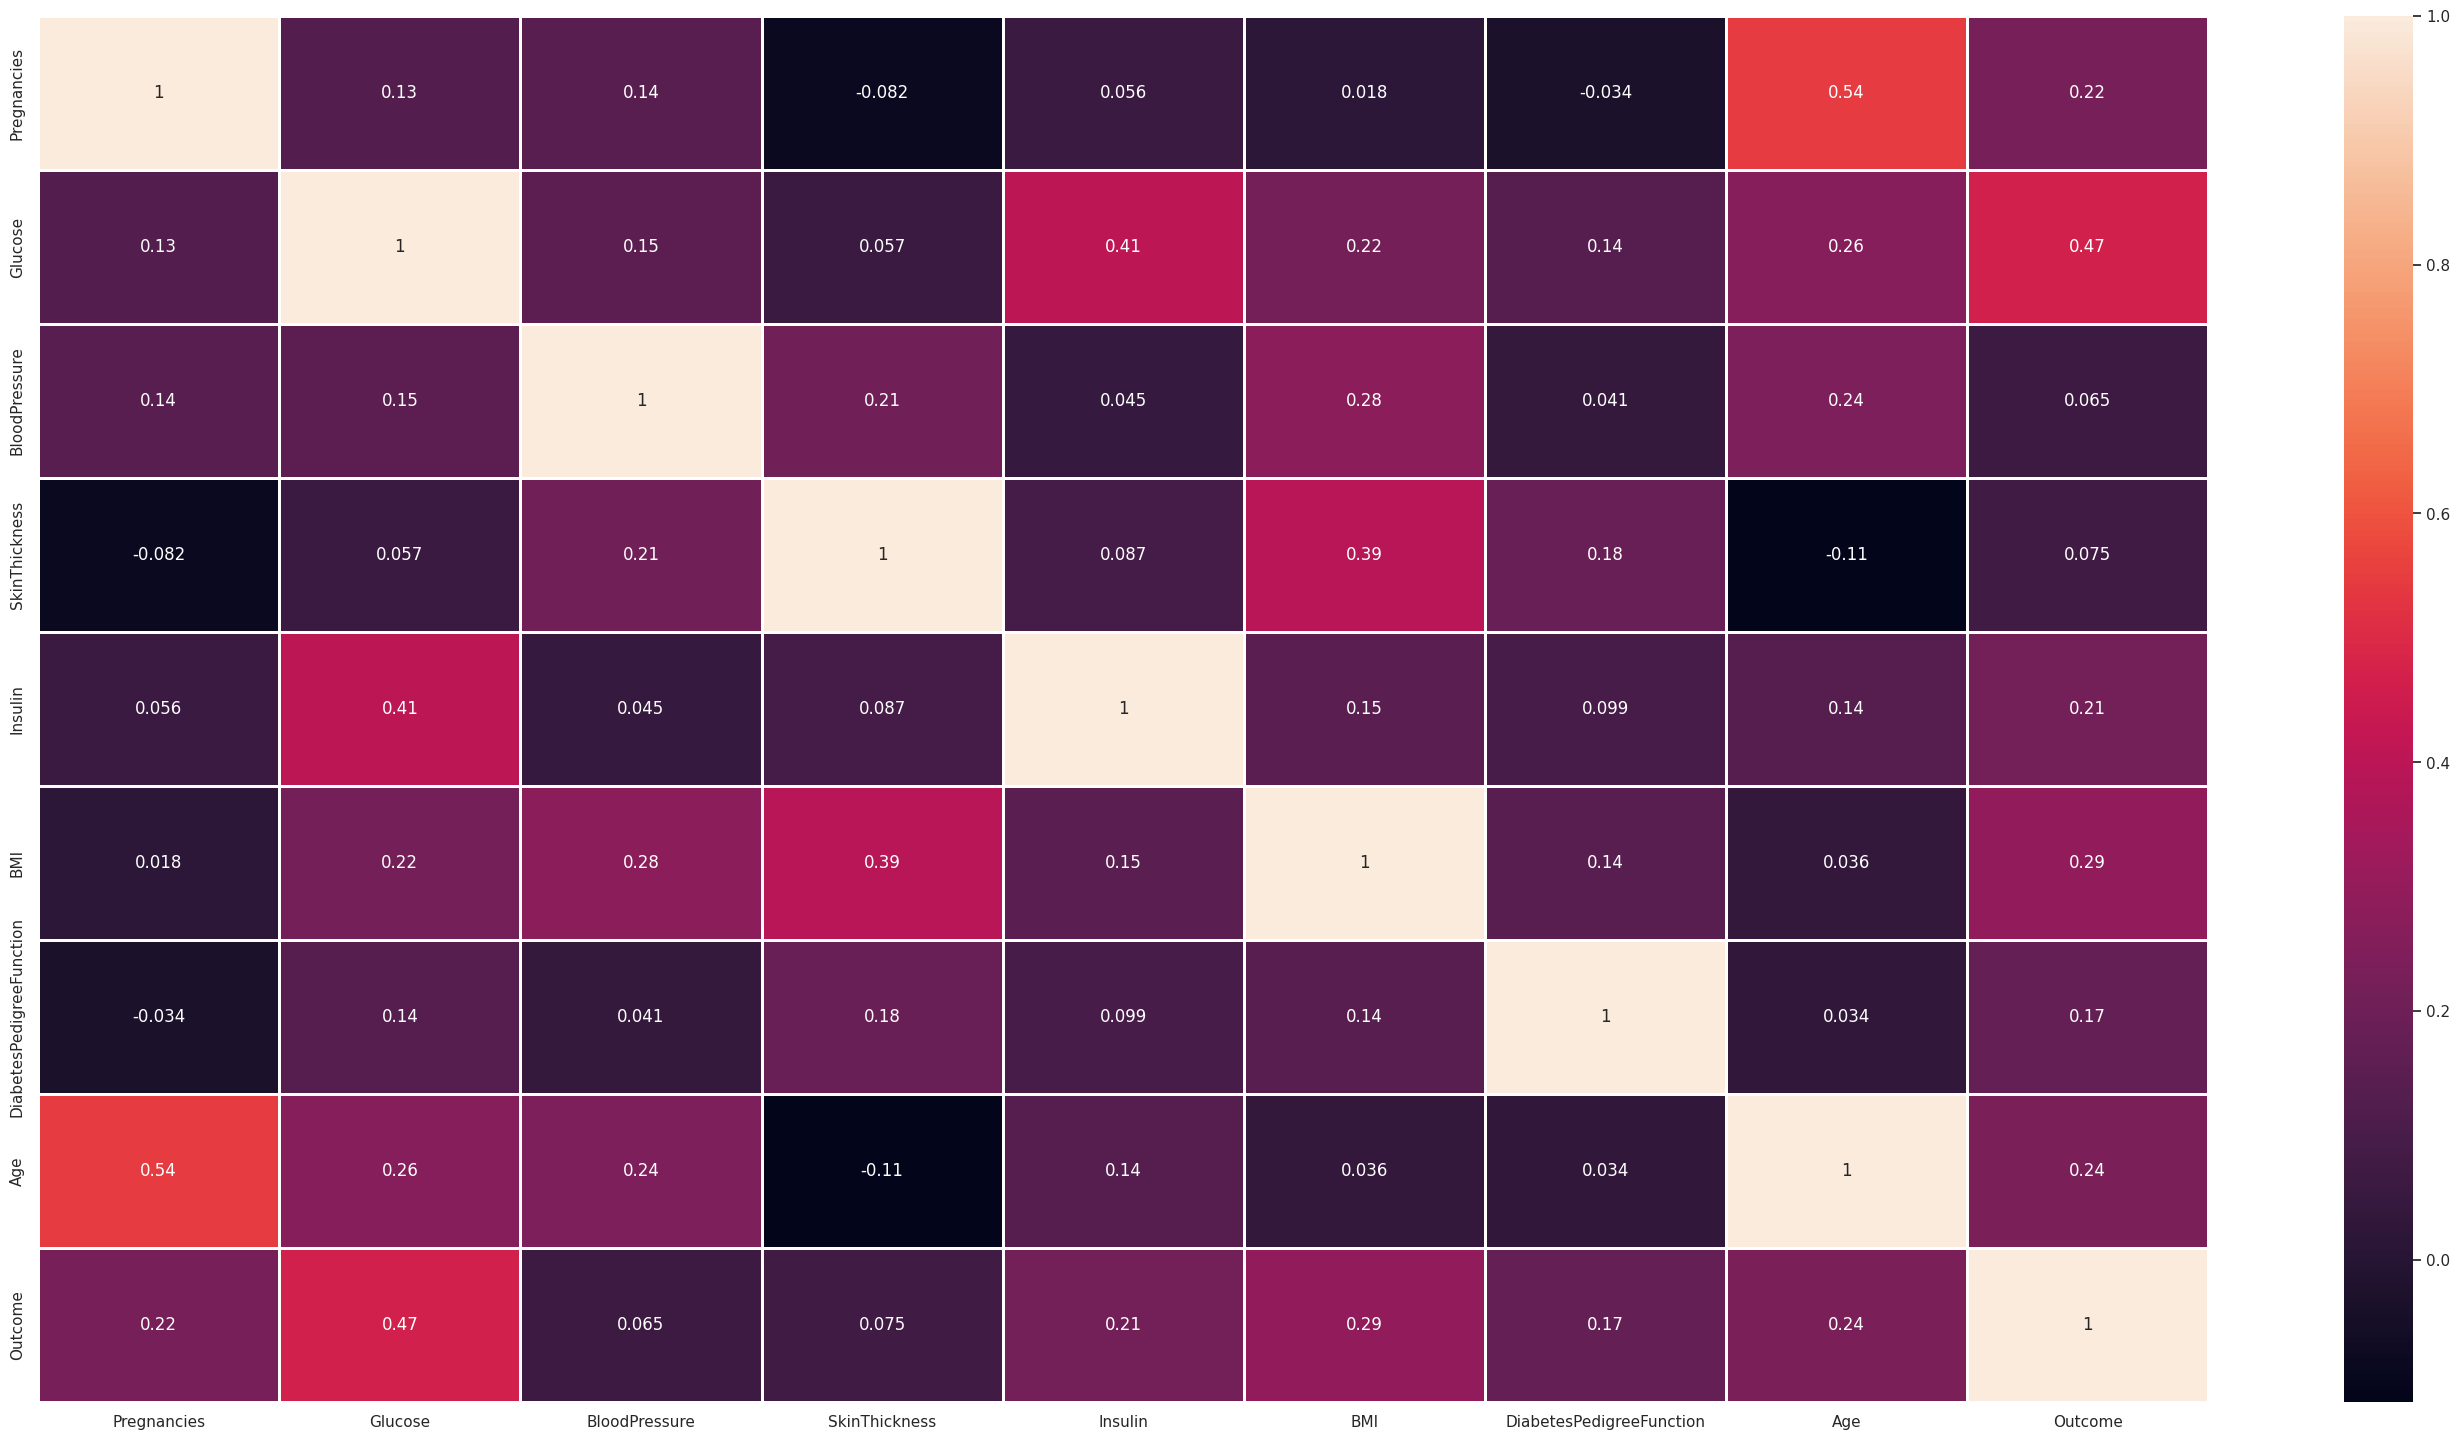

In [15]:
sn.set(rc={'figure.figsize':(35,18)})
mn = sn.heatmap(data=data1_processed.corr(),linewidths=.75,annot=True)
plt.show()

## Splitting the data into test and train

Splitting data into train set which will be used by learing algorithm for training the model and test set which will be used by inference algorithm for predicting the values. 768 samples are divided into the sets of 614 (Train set) and 154 (Test Set). Train set has 400 samples of "Outcome"=0 and 214 samples of "Outcome"=1. Whereas, Test set has 100 samples of "Outcome"=0 and 154 samples of "Outcome"=1.

In [16]:
df0=data1Standardized[data1Standardized['Outcome']==0]
df1=data1Standardized[data1Standardized['Outcome']==1]
df0=df0.sample(frac=1,random_state=142)
df1=df1.sample(frac=1,random_state=142)
train_size1=int(0.8*len(df0))
train_size2=int(0.8*len(df1))
df_a=df0[:train_size1]
df_b=df0[train_size1:]
df_c=df1[:train_size2]
df_d=df1[train_size2:]
train_set=pd.concat([df_a,df_c])
train_set=train_set.sample(frac=1)
test_set=pd.concat([df_b,df_d])
print(train_set['Outcome'].value_counts())
print(test_set['Outcome'].value_counts())

0    400
1    214
Name: Outcome, dtype: int64
0    100
1     54
Name: Outcome, dtype: int64


Dataframes are converted into numpy arrays.

In [17]:
train_set_y=np.array(train_set['Outcome'].tolist())
train_set_X=train_set.drop(columns=['Outcome']).to_numpy()
test_set_y=np.array(test_set['Outcome'].tolist())
test_set_X=test_set.drop(columns=['Outcome']).to_numpy()
# print(shape(test_set_X))
# data1Standardized['Outcome'].value_counts()

## Training the model using gradient descent (Multivariate)

Different accuracies are obtained by different combinations of learning rate and number of iterations:
Learning Rate       No of iterations      Accuracy
0.05                 100                   0.65
0.2                  100                   0.38
0.2                  200                   0.36
0.02                 200                   0.65
0.02                 1000                  0.38
0.05                 200                   0.71
Hence, 0.05 and 200 are picked as Learning rate and number of iterations.

In [18]:
W,b=weightInitialization(train_set_X.shape[1])
coef_returned,grad_returned,cost_returned=train(W,b,train_set_X,train_set_y,learningRate=0.05,N=200)

Cost after 0 iteration is 0.693147
Cost after 1 iteration is 0.691344
Cost after 2 iteration is 0.689630
Cost after 3 iteration is 0.688001
Cost after 4 iteration is 0.686452
Cost after 5 iteration is 0.684980
Cost after 6 iteration is 0.683580
Cost after 7 iteration is 0.682248
Cost after 8 iteration is 0.680981
Cost after 9 iteration is 0.679775
Cost after 10 iteration is 0.678628
Cost after 11 iteration is 0.677535
Cost after 12 iteration is 0.676495
Cost after 13 iteration is 0.675504
Cost after 14 iteration is 0.674560
Cost after 15 iteration is 0.673660
Cost after 16 iteration is 0.672802
Cost after 17 iteration is 0.671984
Cost after 18 iteration is 0.671204
Cost after 19 iteration is 0.670459
Cost after 20 iteration is 0.669748
Cost after 21 iteration is 0.669069
Cost after 22 iteration is 0.668420
Cost after 23 iteration is 0.667801
Cost after 24 iteration is 0.667208
Cost after 25 iteration is 0.666641
Cost after 26 iteration is 0.666099
Cost after 27 iteration is 0.665580
Co

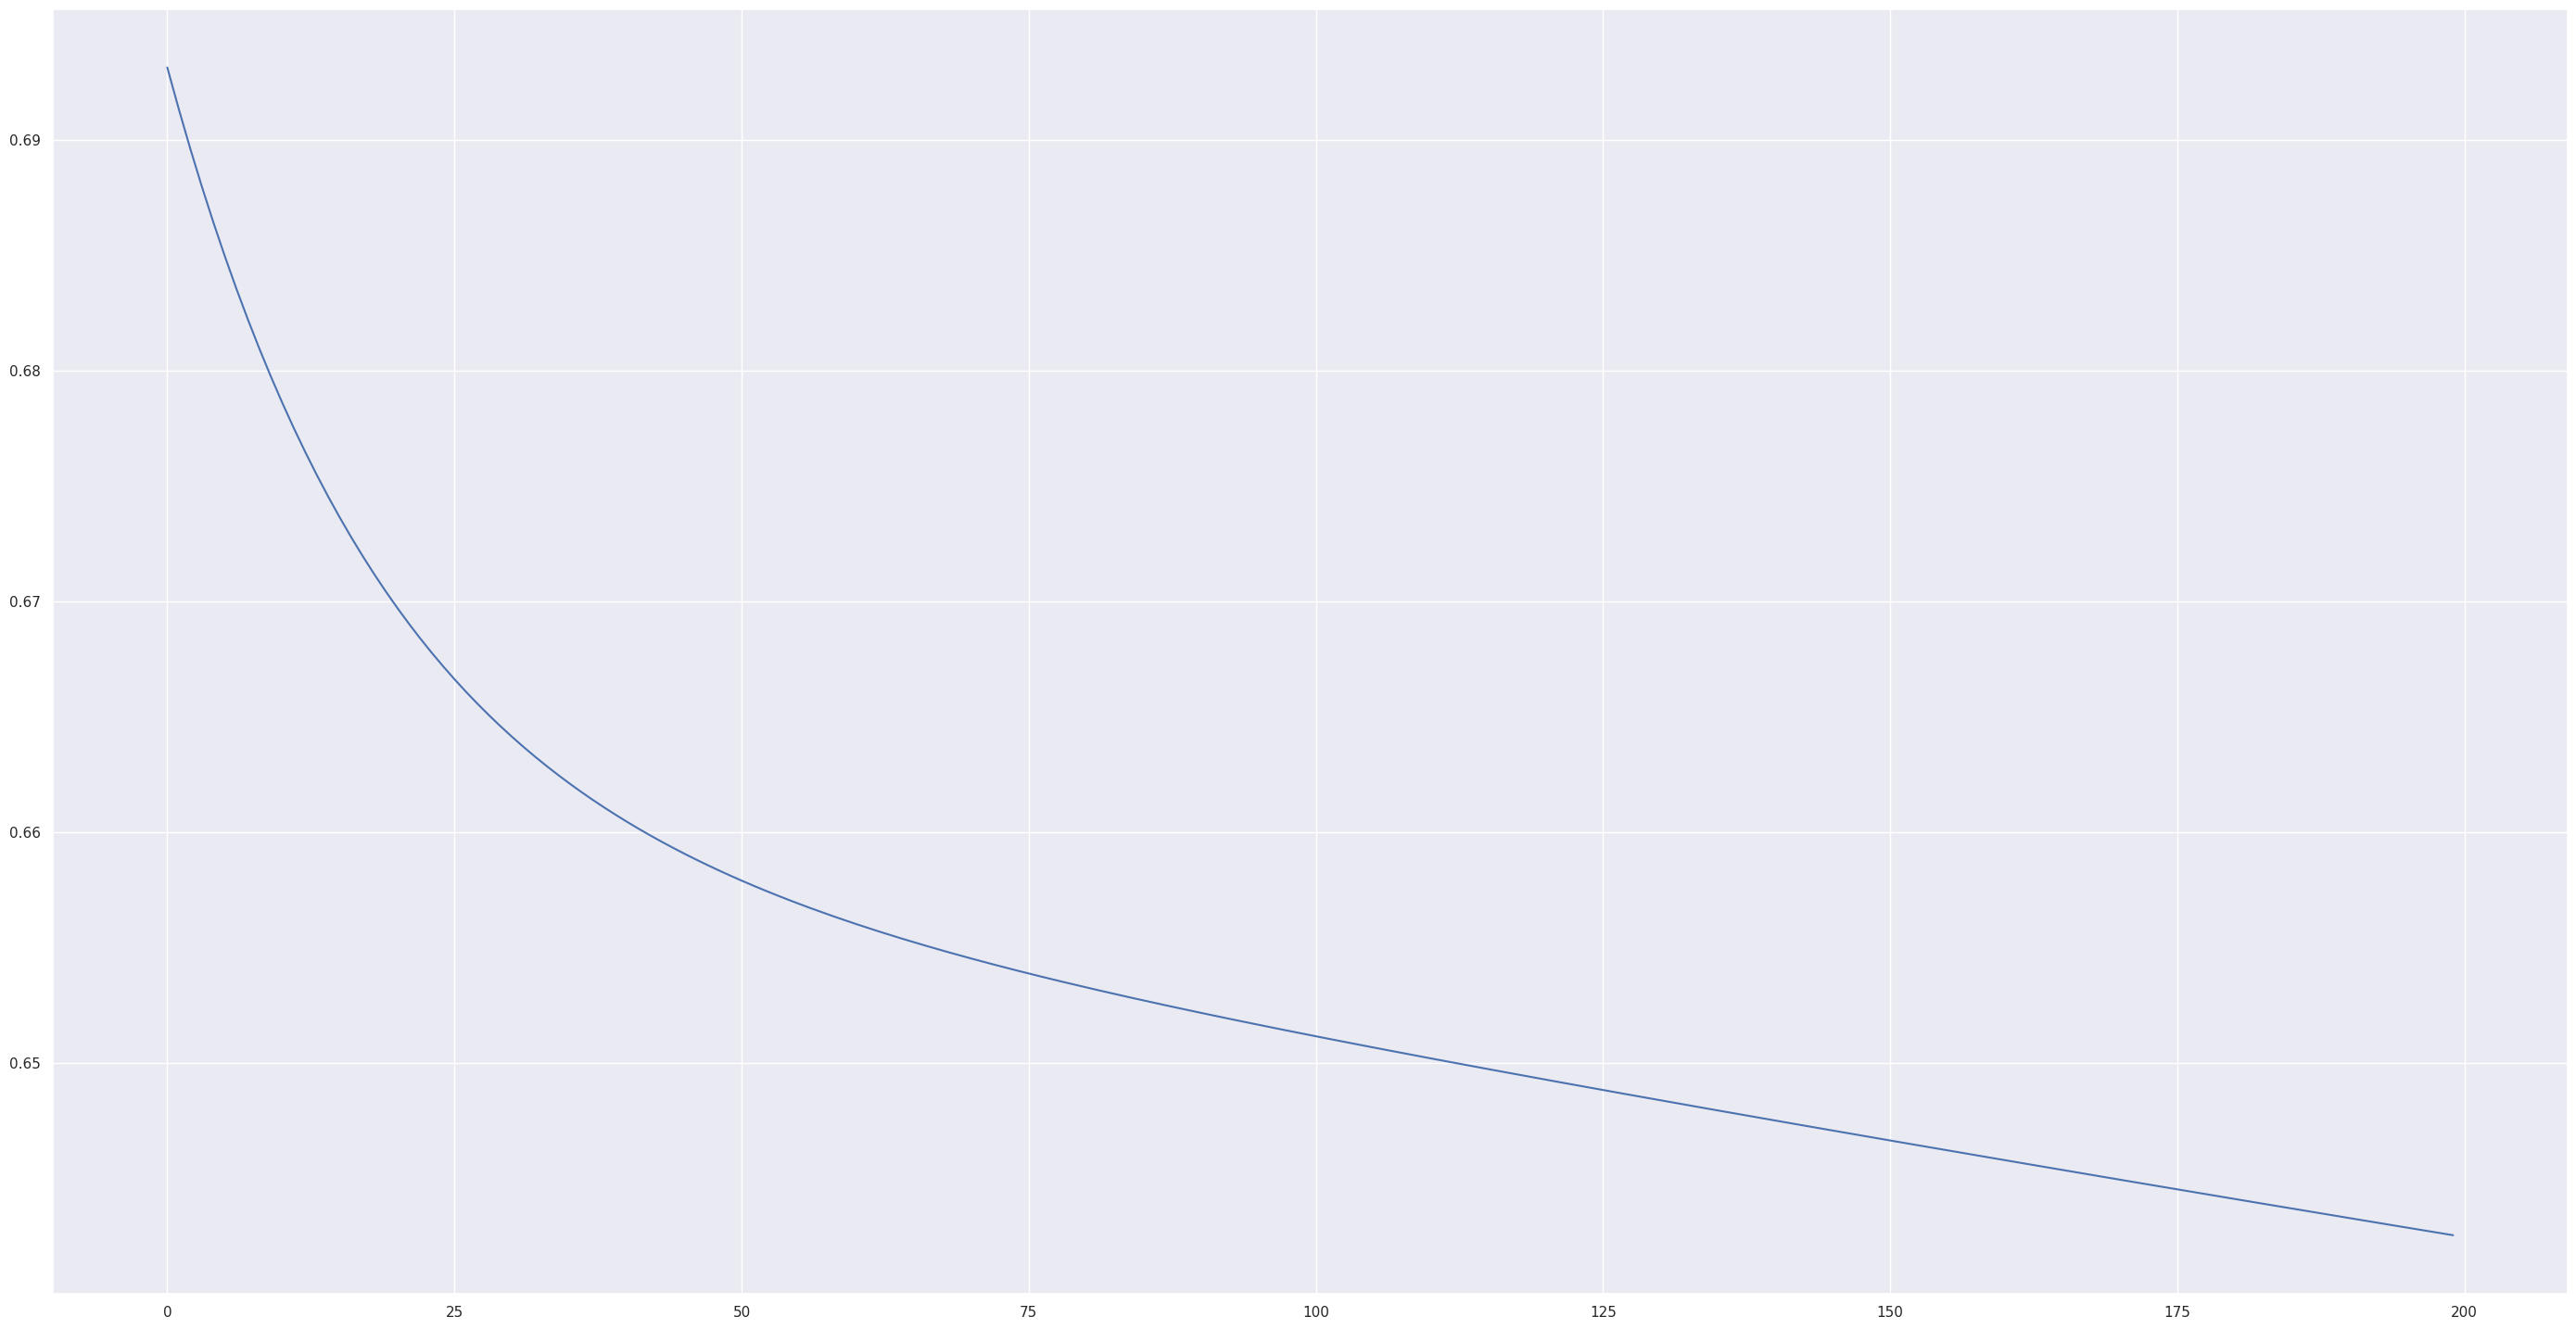

In [19]:
plt.plot(range(len(cost_returned)),cost_returned)

## Predicting output for test data

In [20]:
print(coef_returned['w'][0])
W=np.array(coef_returned['w'][0])
y_pred=infer(W,b,test_set_X)
# print(y_pred)
# print(len(y_pred))
print(y_pred.shape)
y_pred= np.where(y_pred>0.5, 1, 0)
# print(y_pred)

[ 0.11084236  0.0581728  -0.18276876 -0.03889203  0.03657237 -0.05759272
  0.03375201  0.12847977]
(154,)


## Checking Accuracy

In [21]:
print(accuracy(y_pred,test_set_y))

0.7077922077922078


## Checking with inbuilt model

In [22]:
clf = LogisticRegression(random_state=0).fit(train_set_X, train_set_y)
Y=clf.predict(test_set_X)
print(classification_report(test_set_y,Y,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [23]:
train_set.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
print(clf.coef_)

[[ 1.71414196  4.14904622 -0.2158291   0.06284789  1.15969568  3.12413768
   1.58659203  0.94463276]]


In [25]:
print(W)

[ 0.11084236  0.0581728  -0.18276876 -0.03889203  0.03657237 -0.05759272
  0.03375201  0.12847977]


In [26]:
print(y_pred.shape)
print(Y.shape)
print(classification_report(test_set_y,y_pred,target_names=['0','1']))

(154,)
(154,)
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       100
           1       0.62      0.44      0.52        54

    accuracy                           0.71       154
   macro avg       0.68      0.65      0.65       154
weighted avg       0.70      0.71      0.69       154



## Naive Bayes Classifier

Checking distribution of the target variable

<AxesSubplot:>

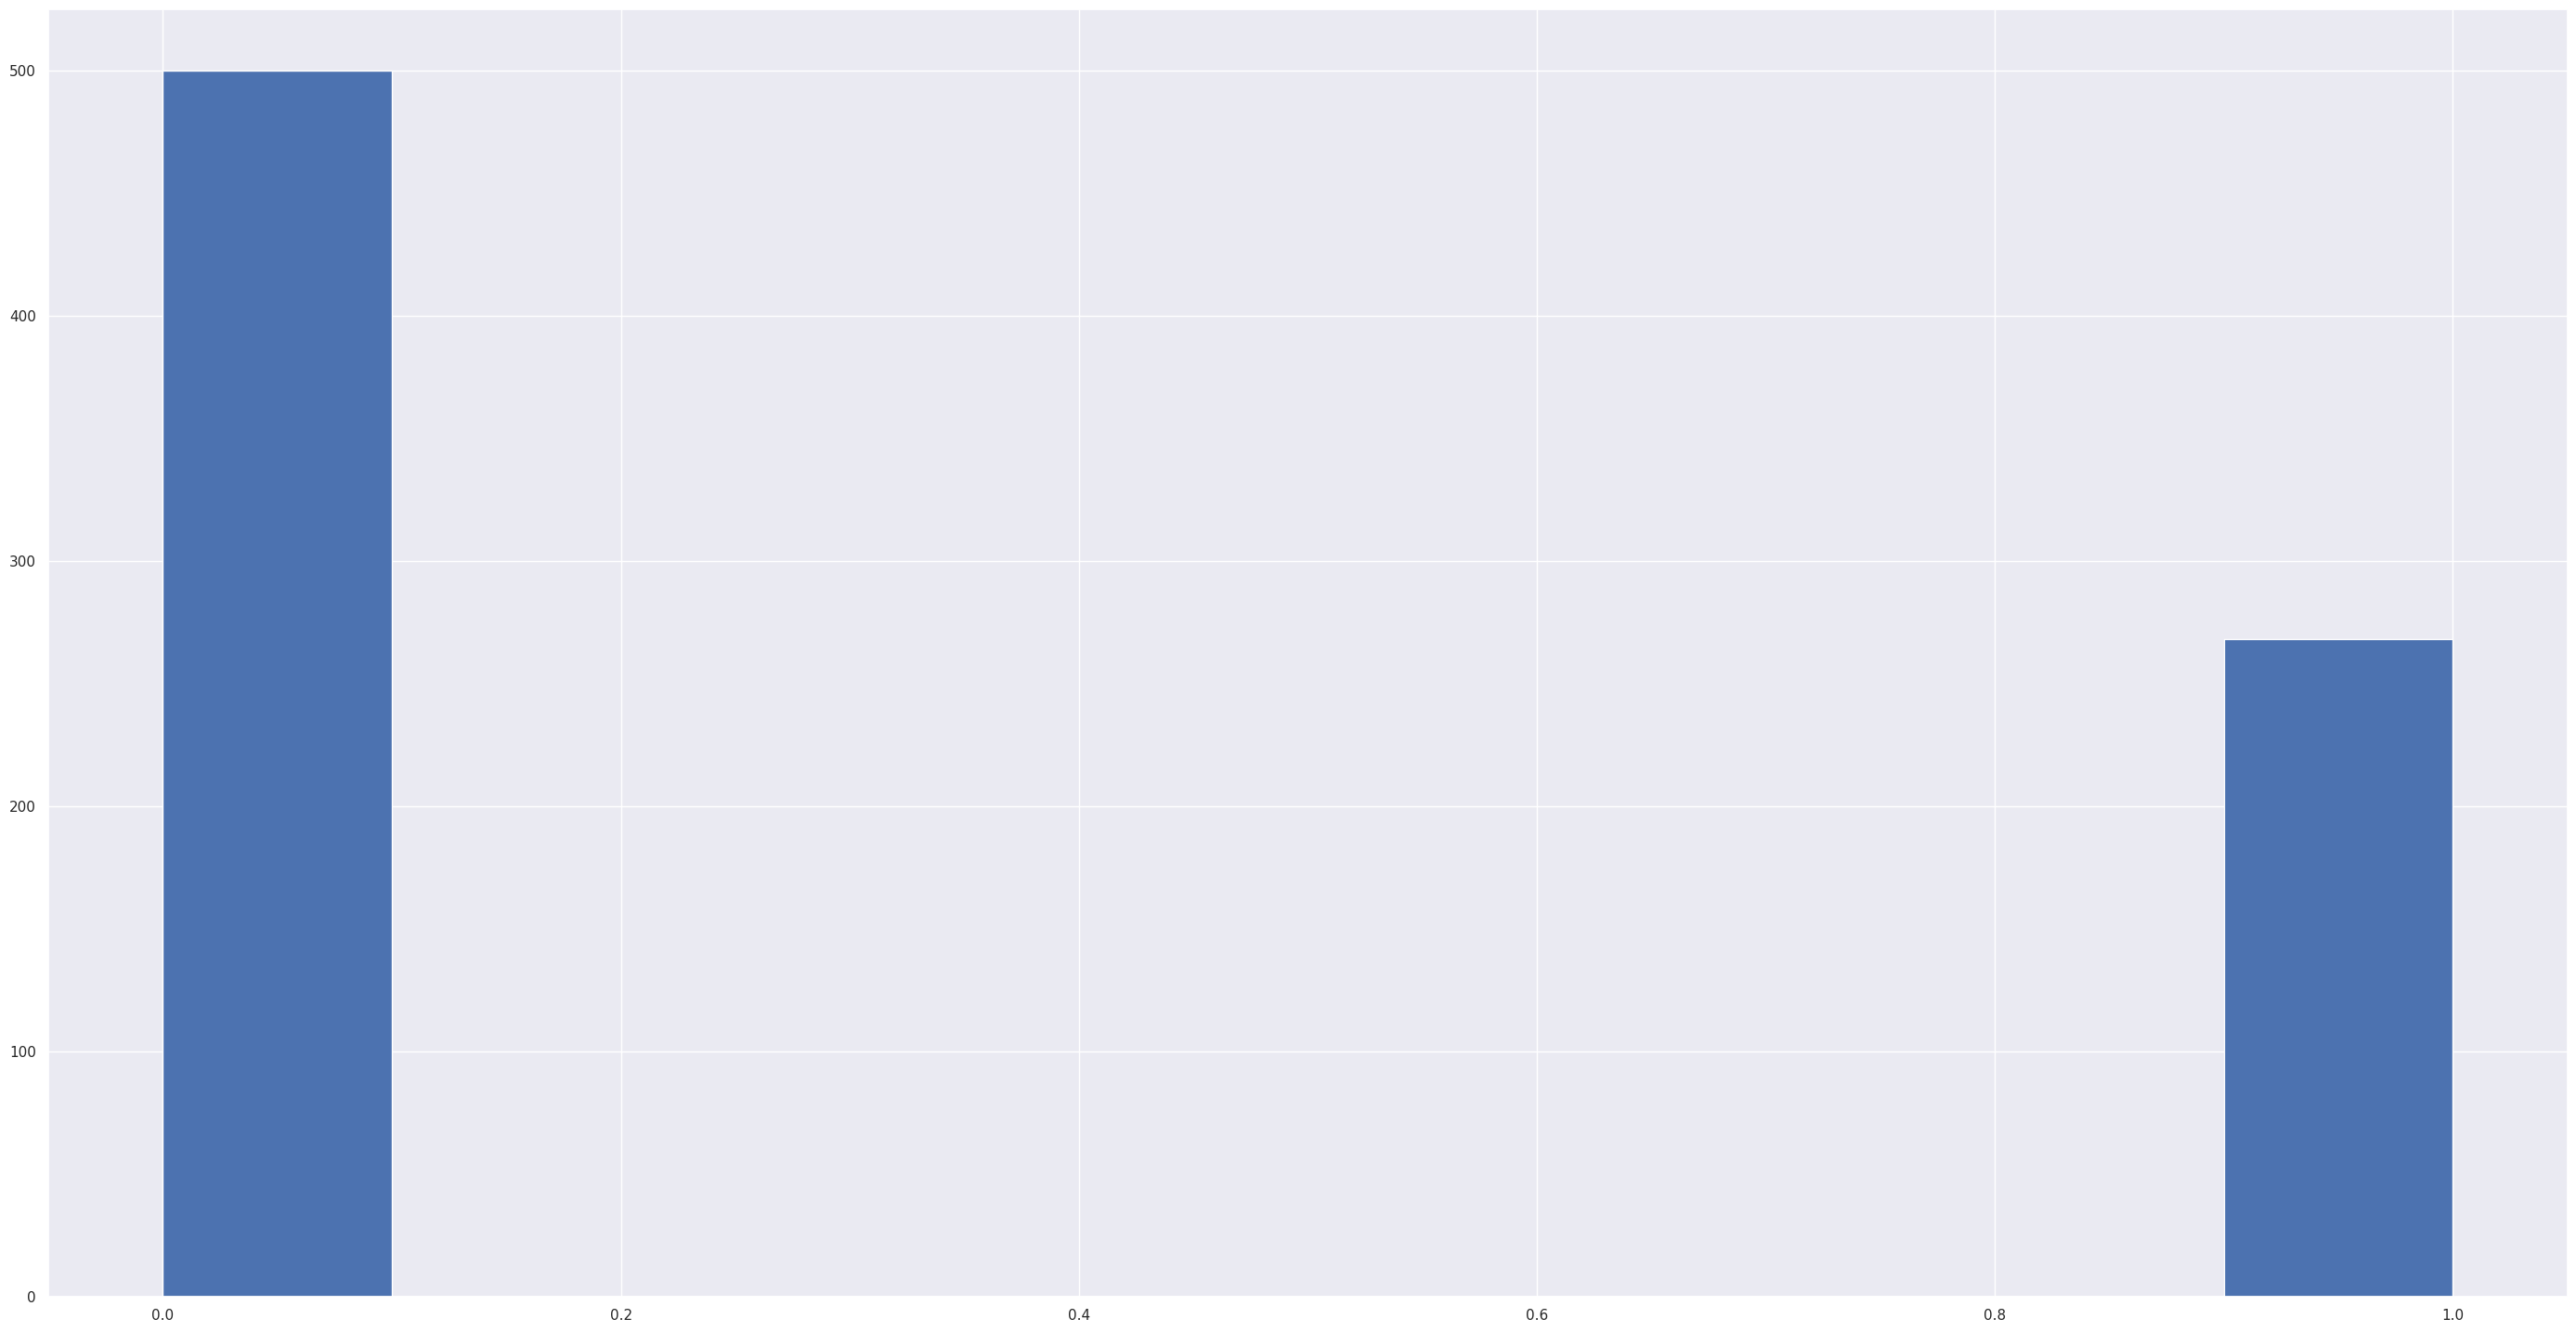

In [27]:
data1["Outcome"].hist()

To apply Naive Bayes Classifier, features have to be independent. Check if features are independent because in Naive Bayes Classifier assumption is that the features are independent. Thats why its called 'naive'. This is done by plotting heatmap.

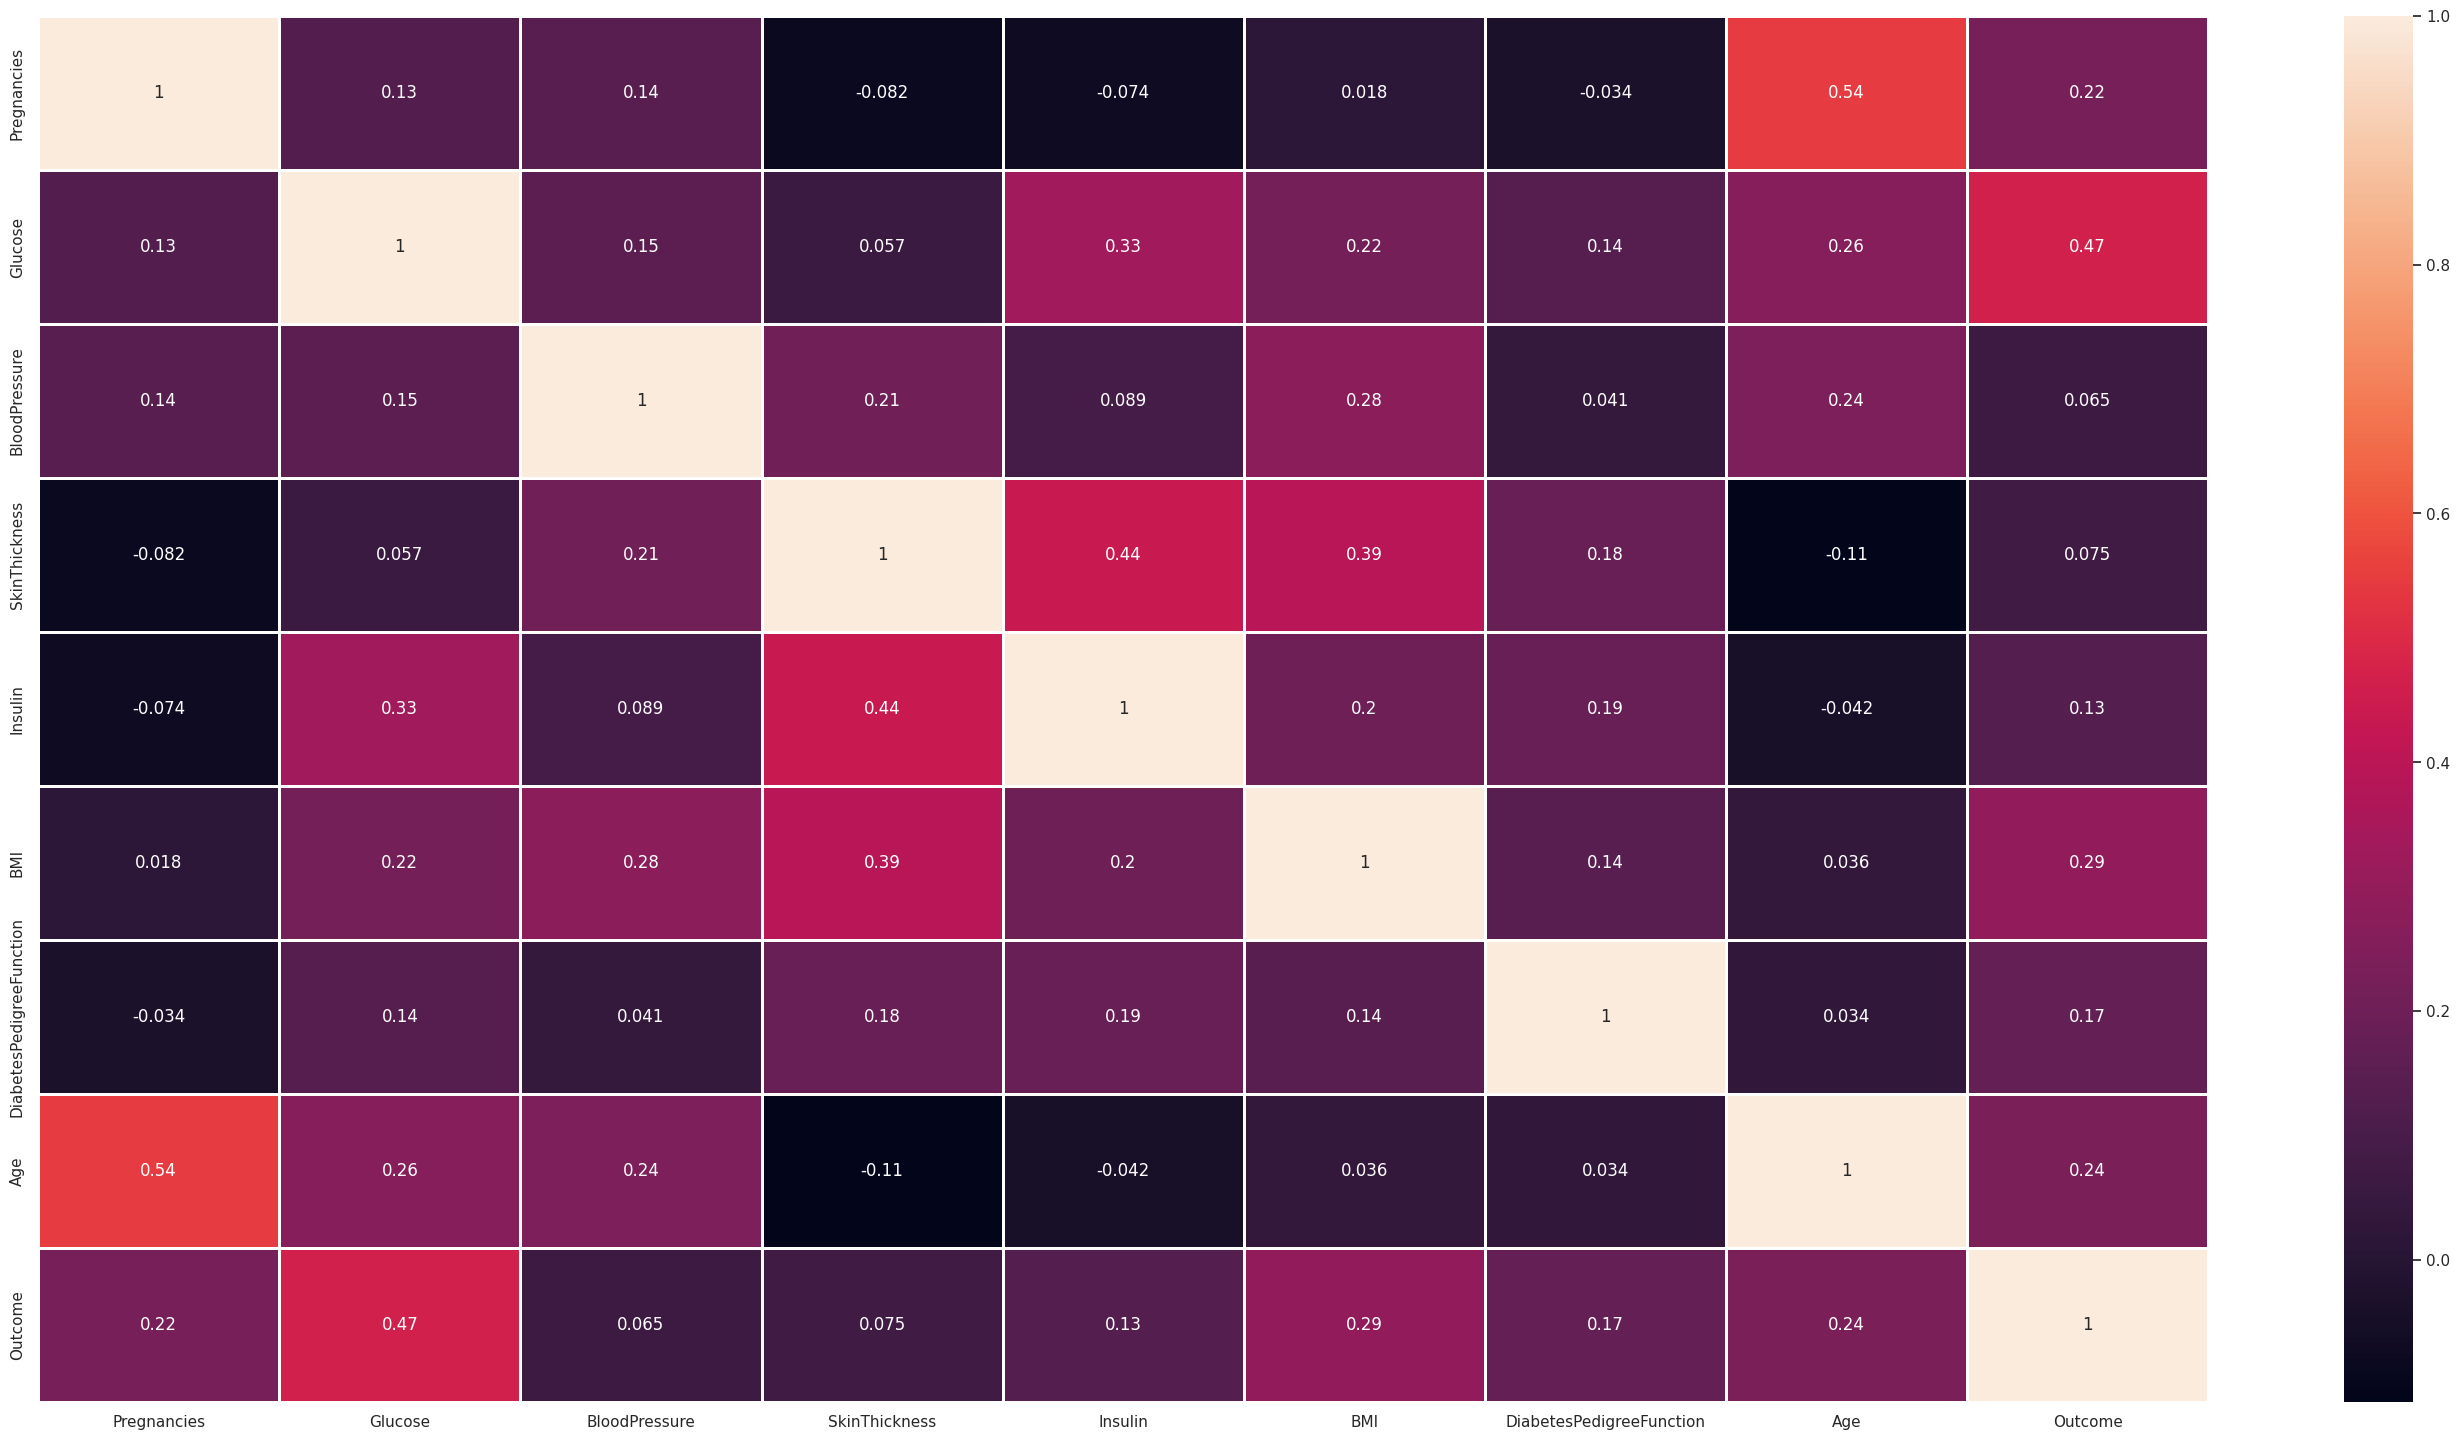

In [28]:
sn.set(rc={'figure.figsize':(35,18)})
mn = sn.heatmap(data=data1.corr(),linewidths=.75,annot=True)
plt.show()

'Age' and 'Pregancies' are highly correalated, so one can be dropped.

In [29]:
print(data1.columns)
# data=data1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
data=data1
data1.head()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Checking distribution of the features again to see whether the distribution of the dataset mimics the known distrinbution or not.

<AxesSubplot:>

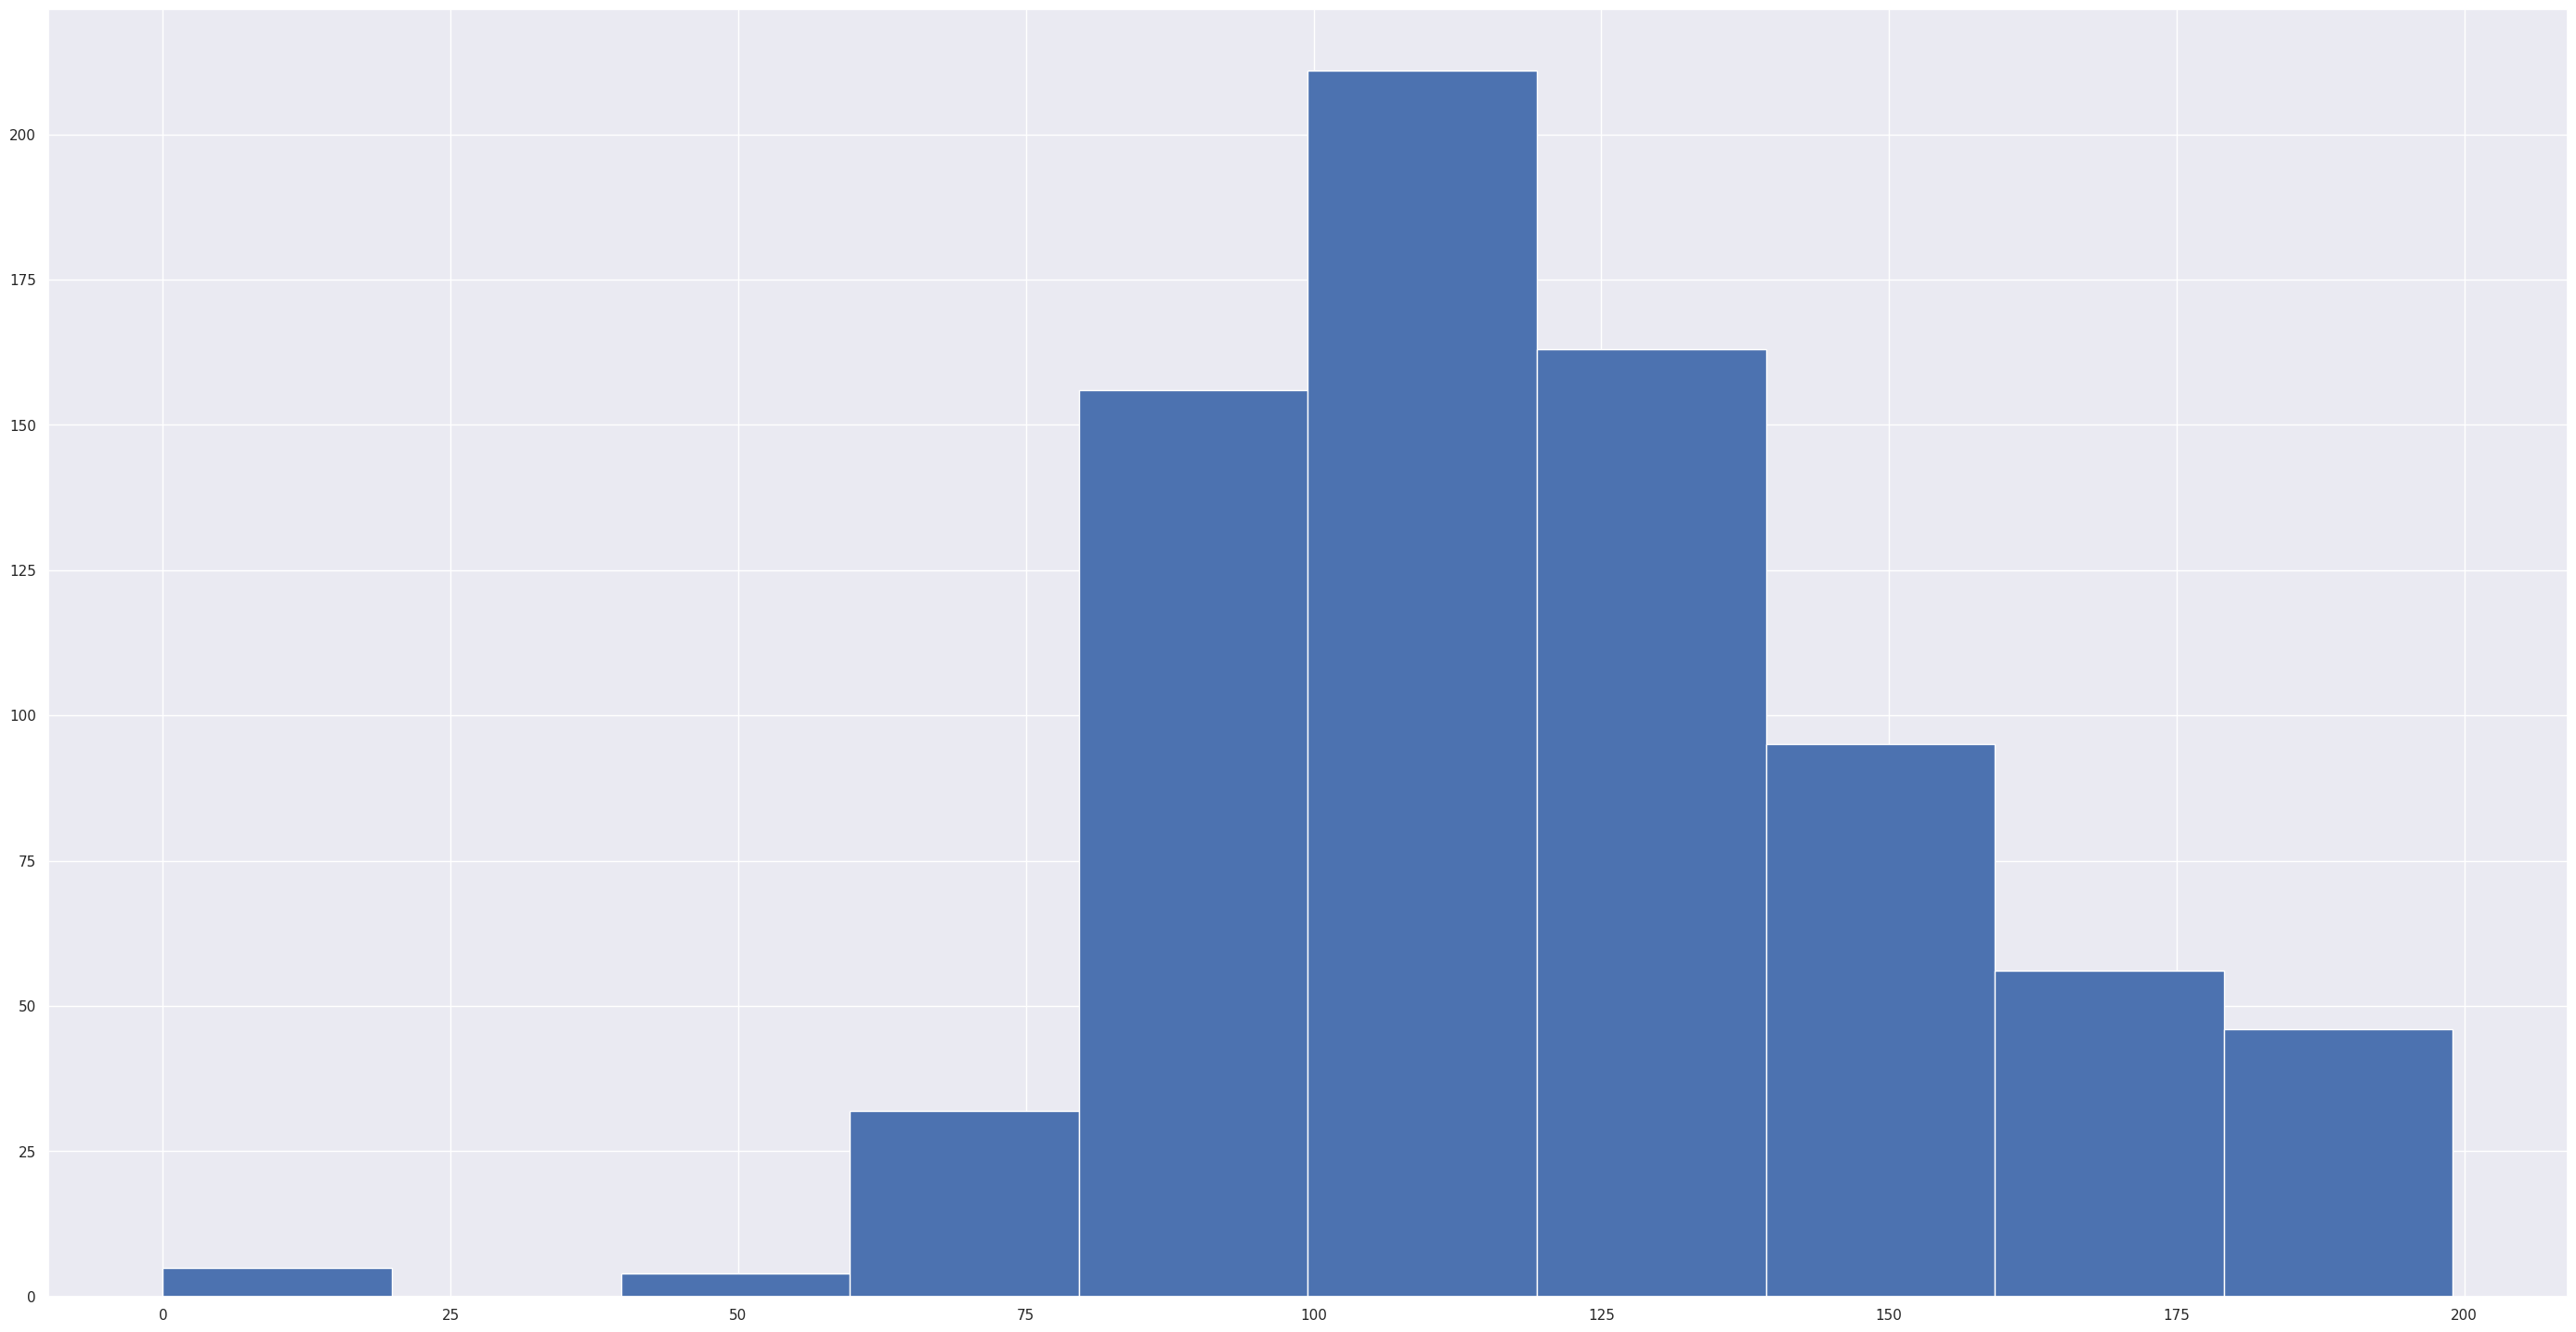

In [30]:
data["Glucose"].hist()

<AxesSubplot:>

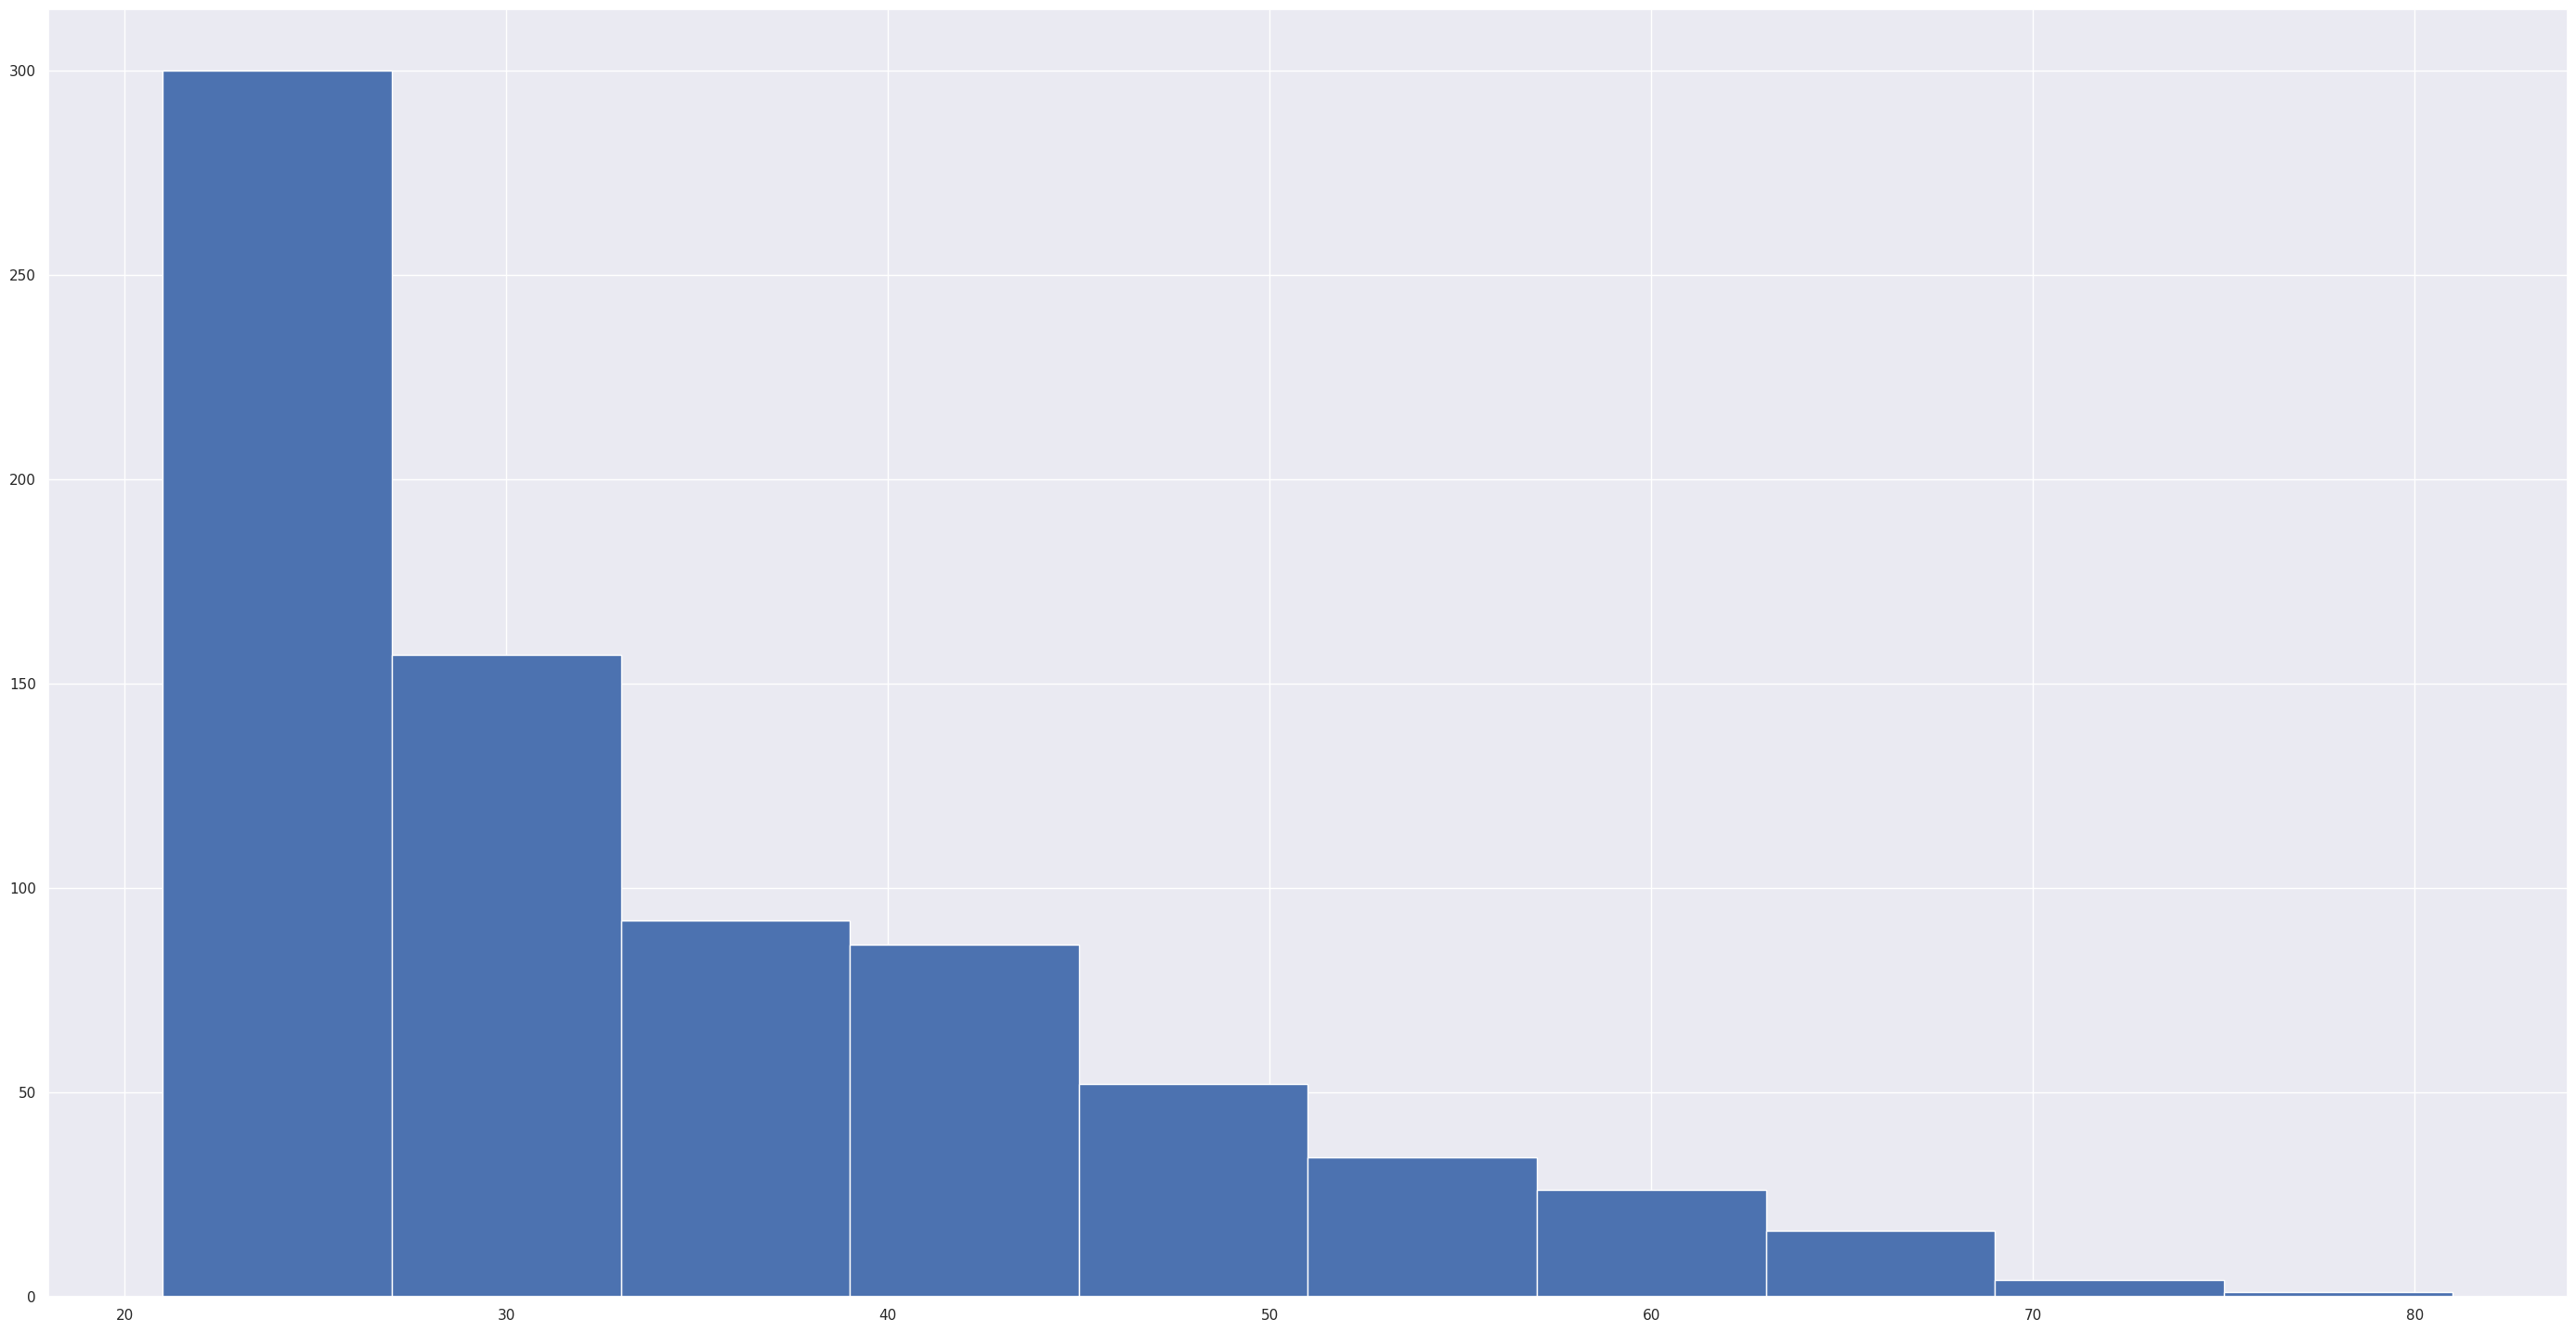

In [31]:
data["Age"].hist()

<AxesSubplot:>

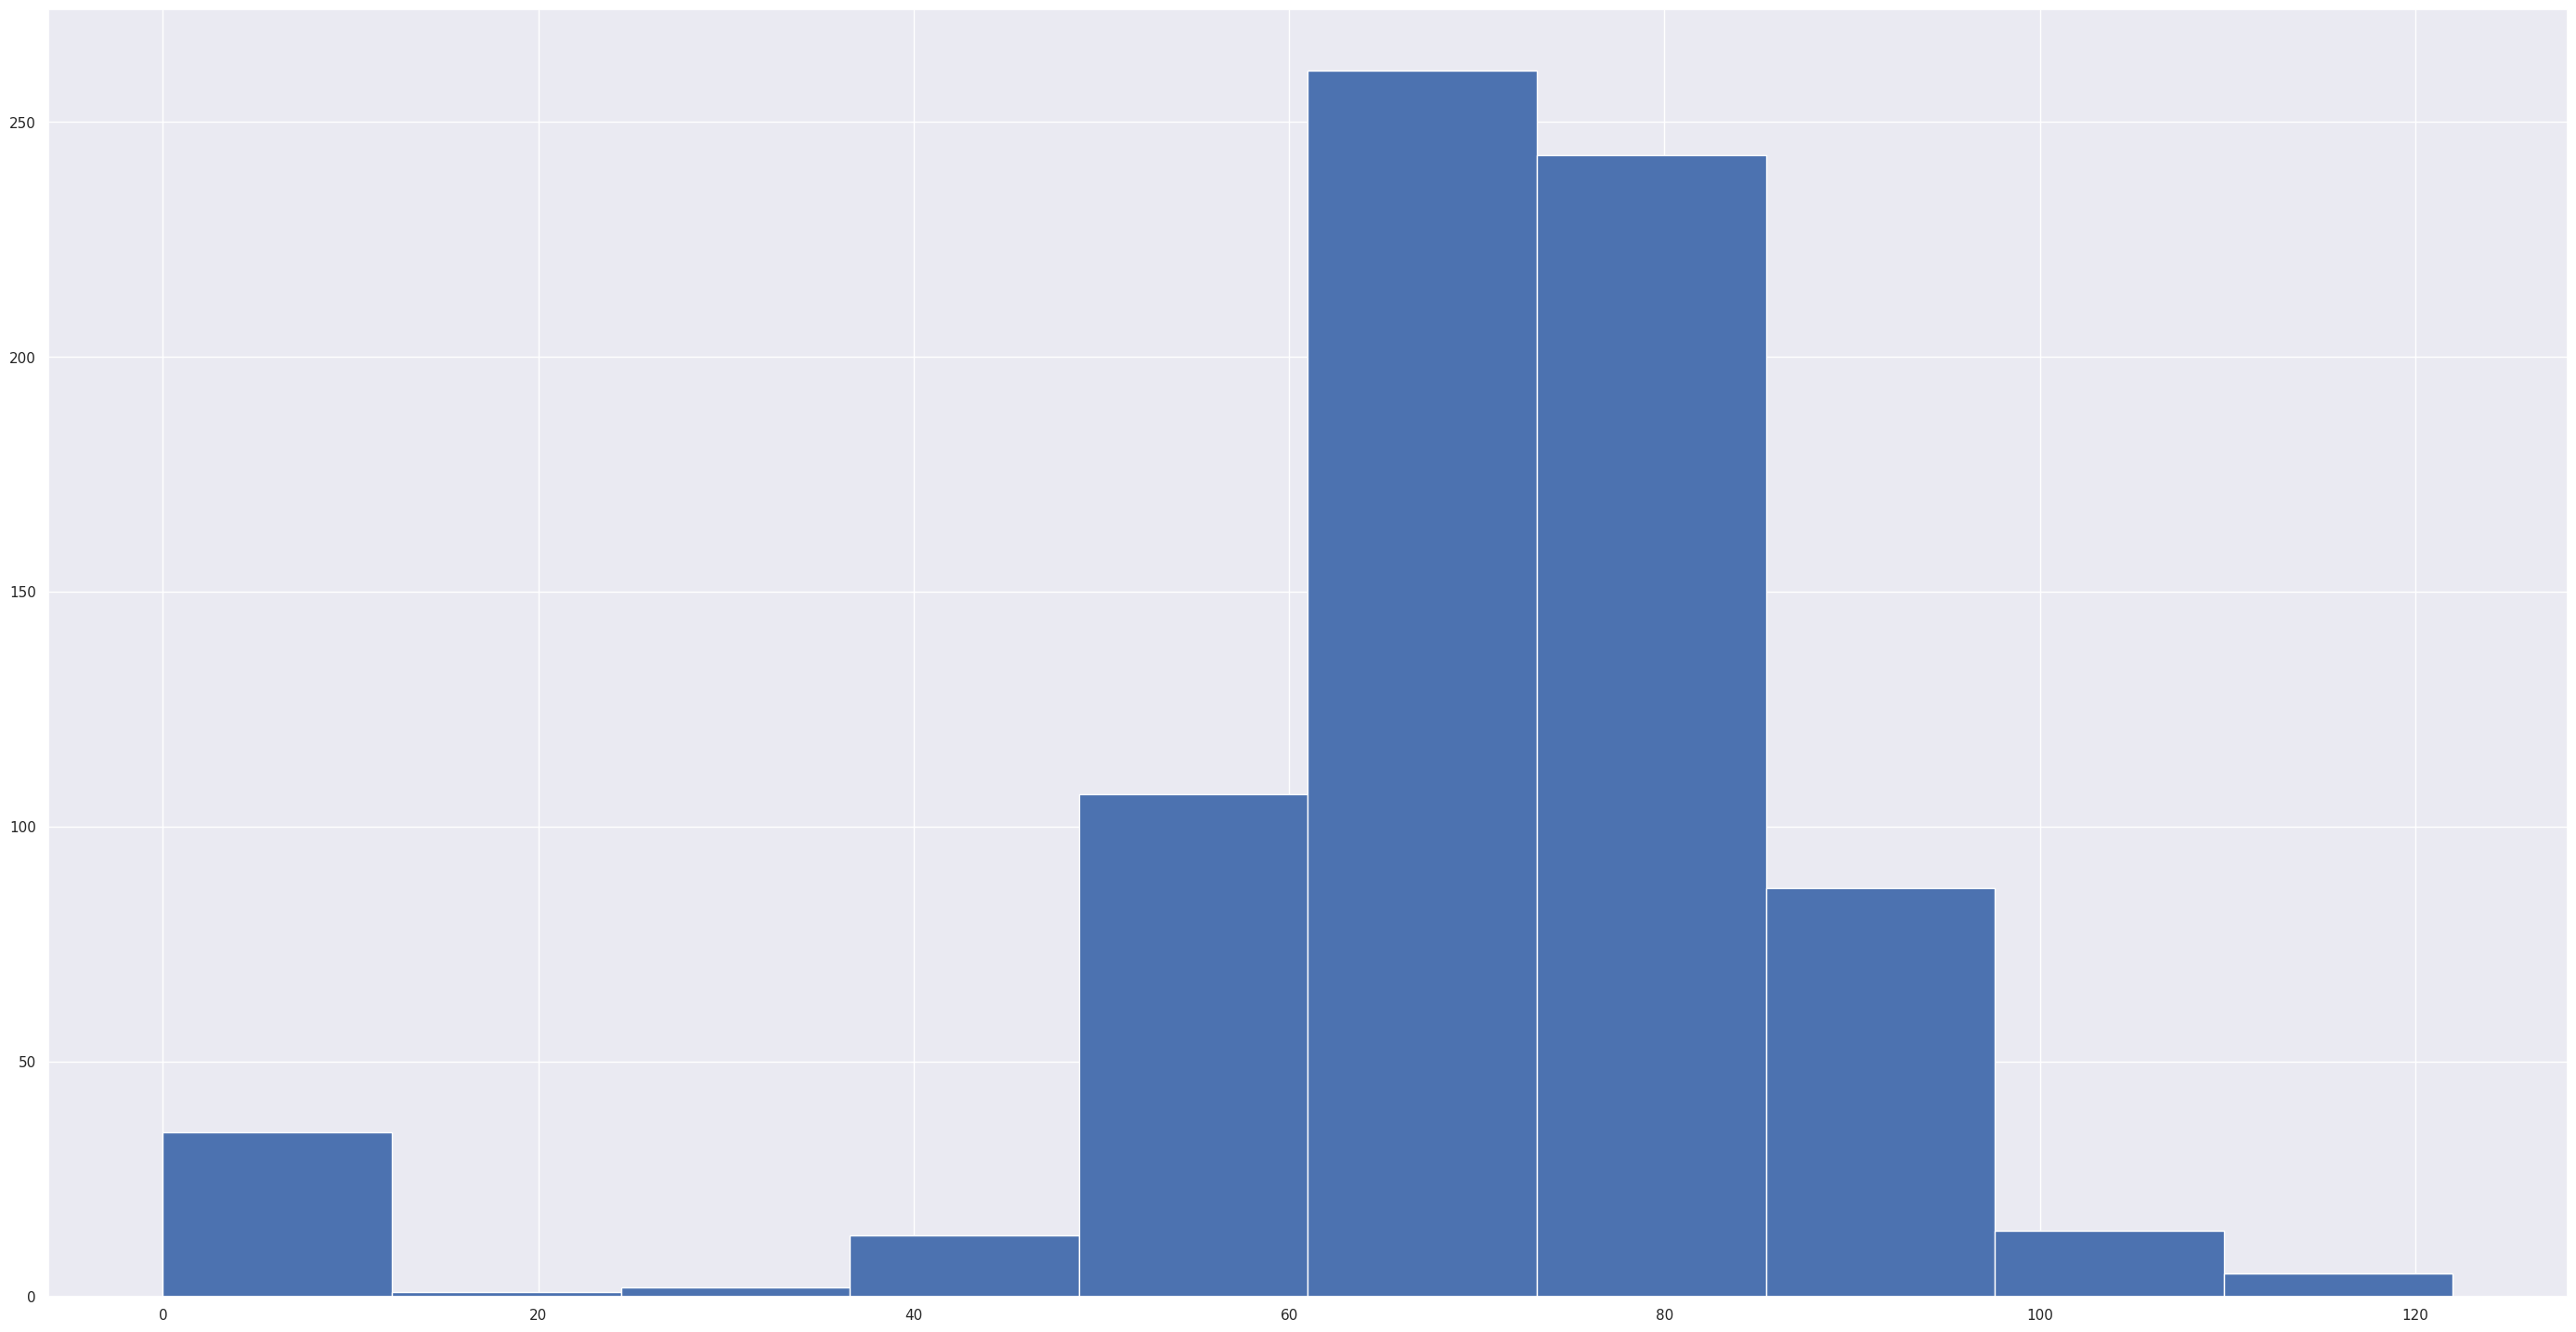

In [32]:
data["BloodPressure"].hist()

<AxesSubplot:>

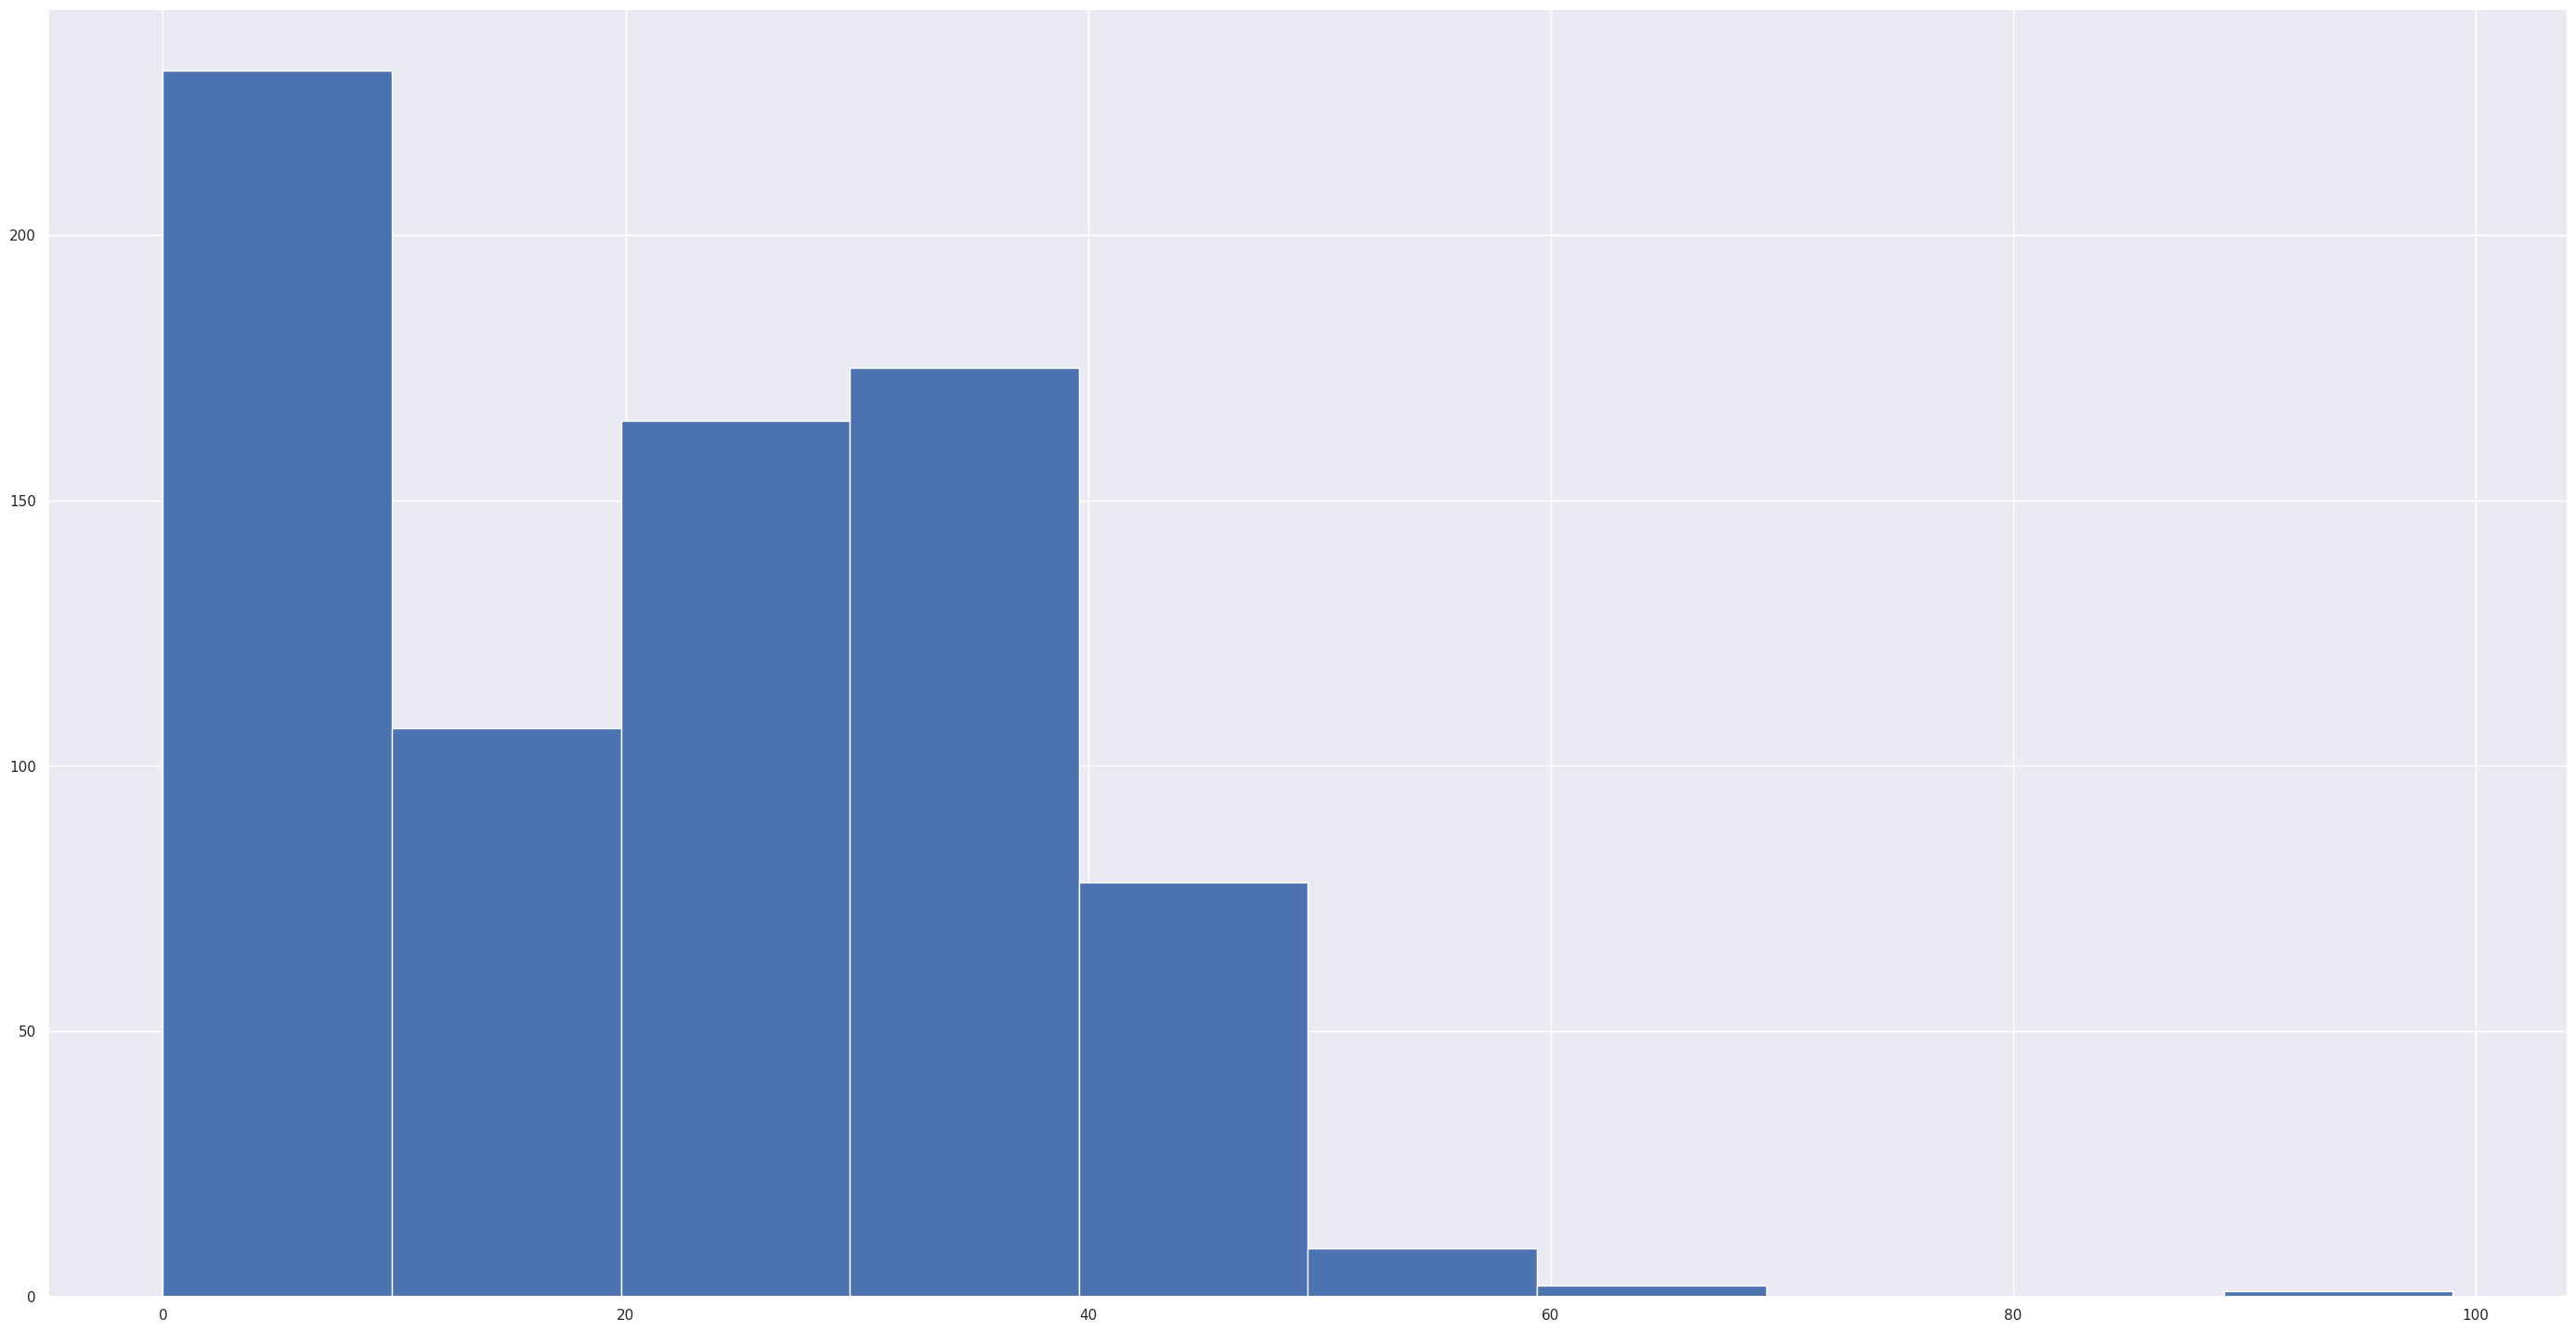

In [33]:
data["SkinThickness"].hist()

<AxesSubplot:>

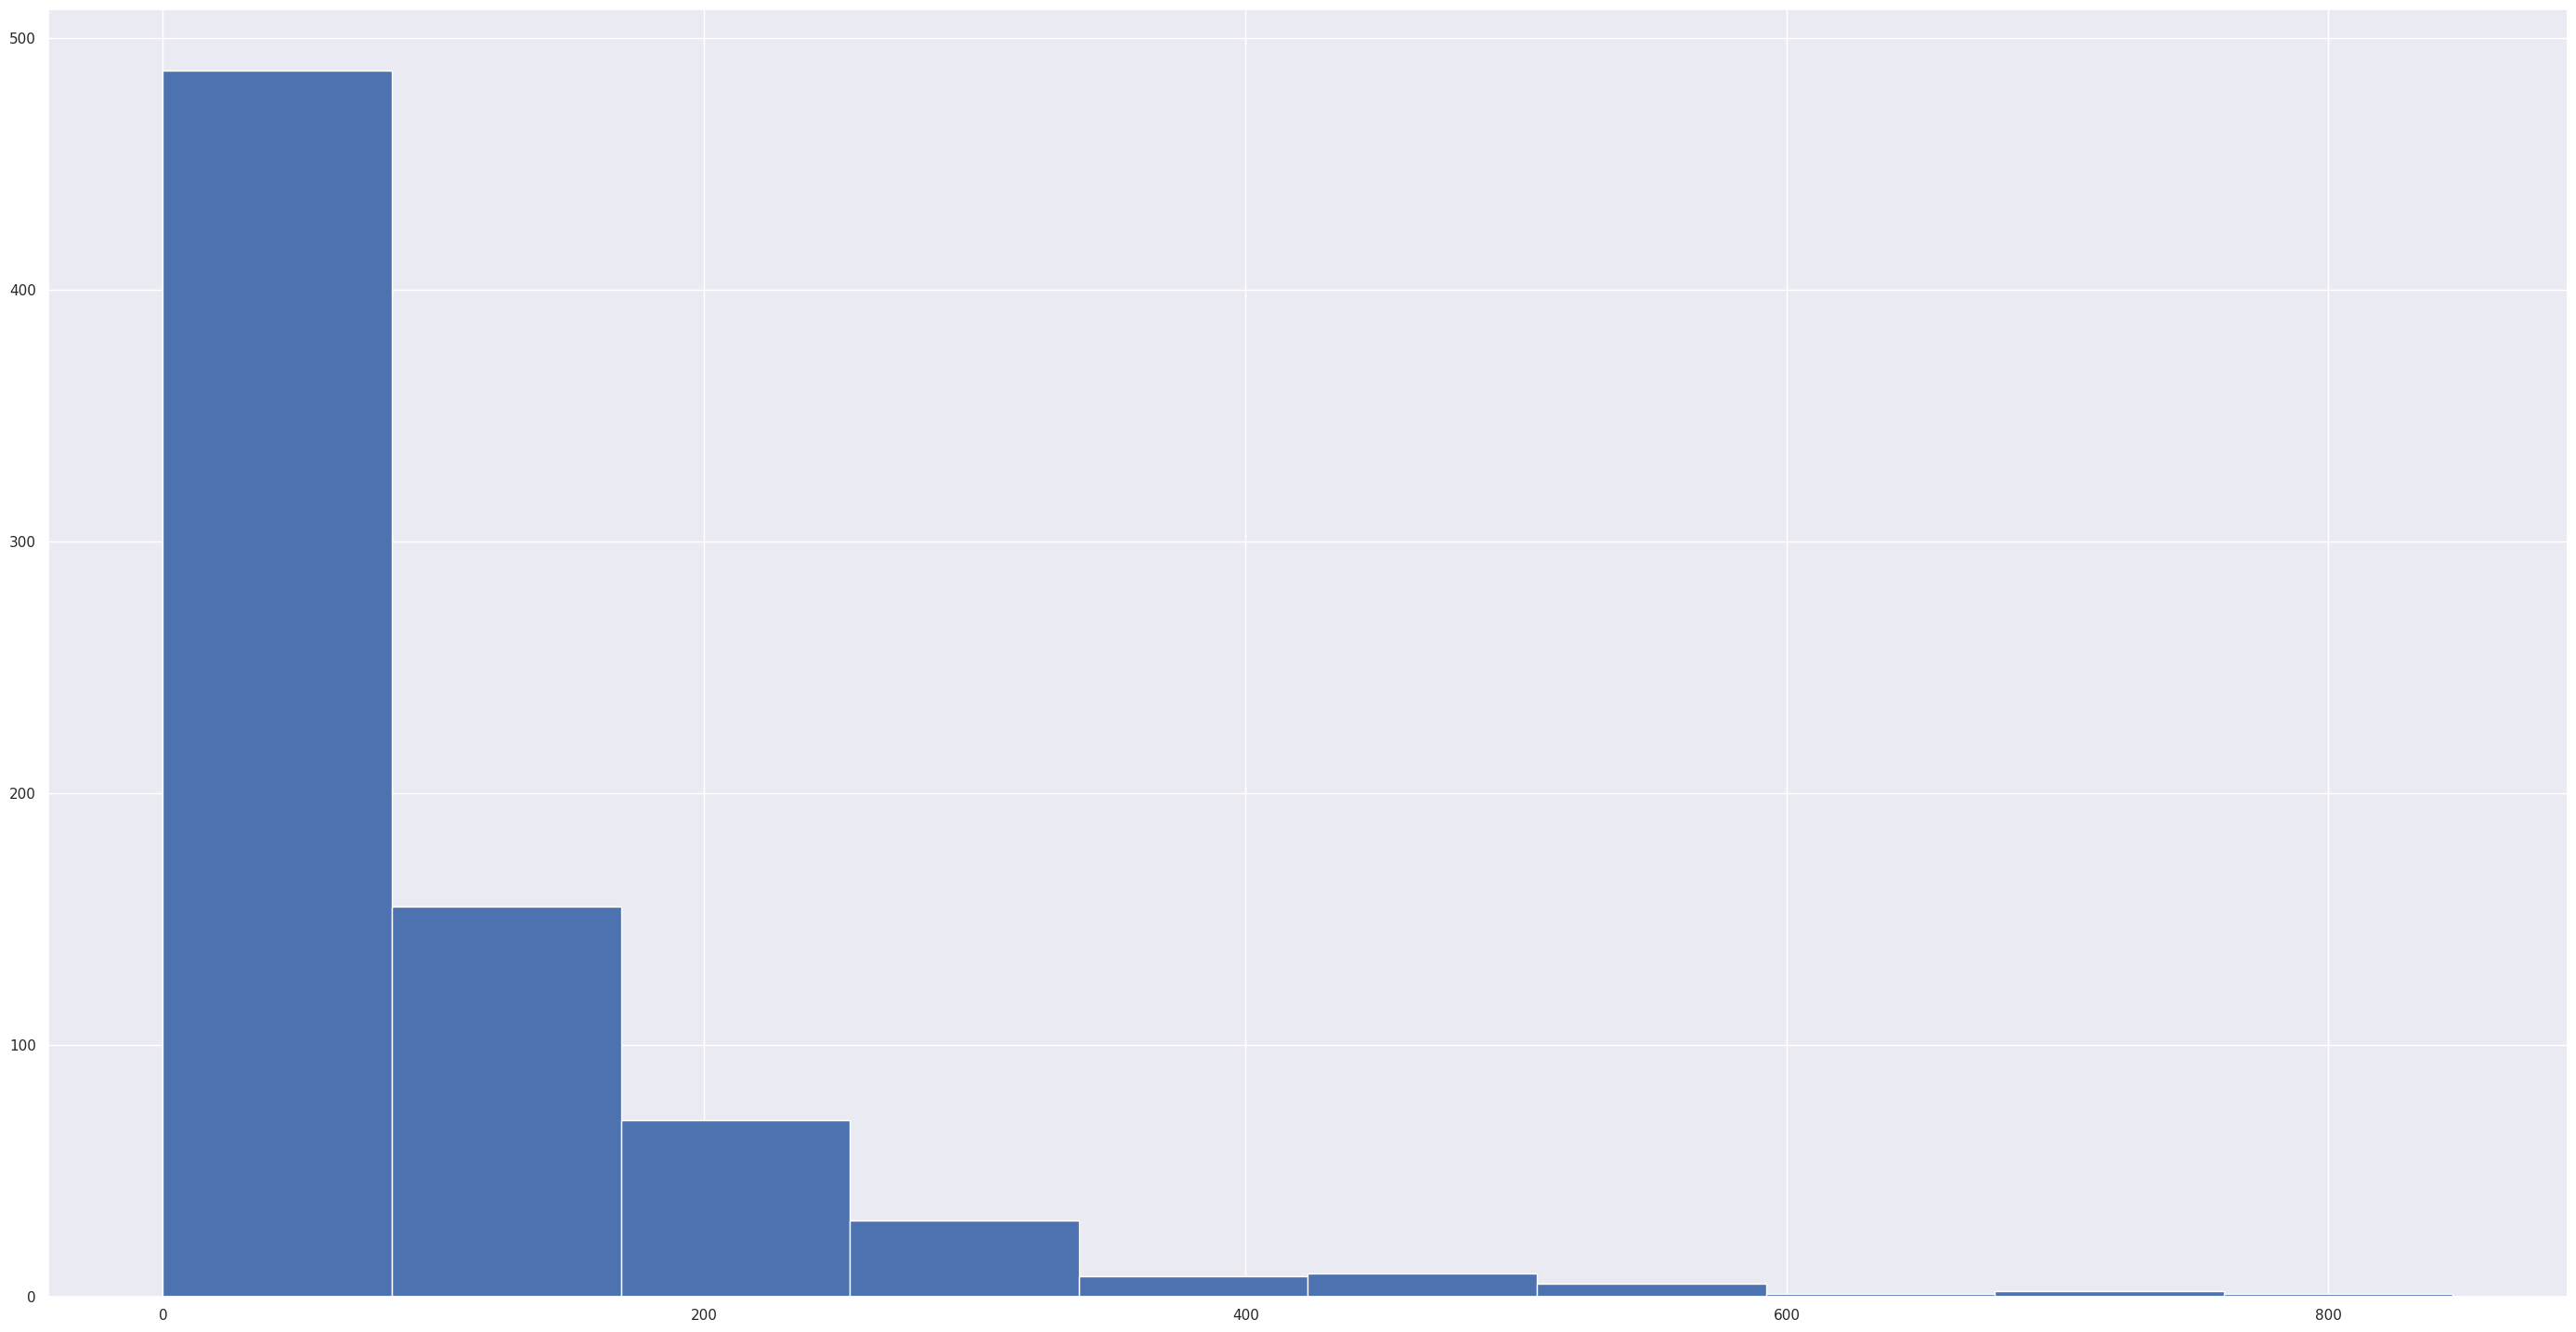

In [34]:
data["Insulin"].hist()

<AxesSubplot:>

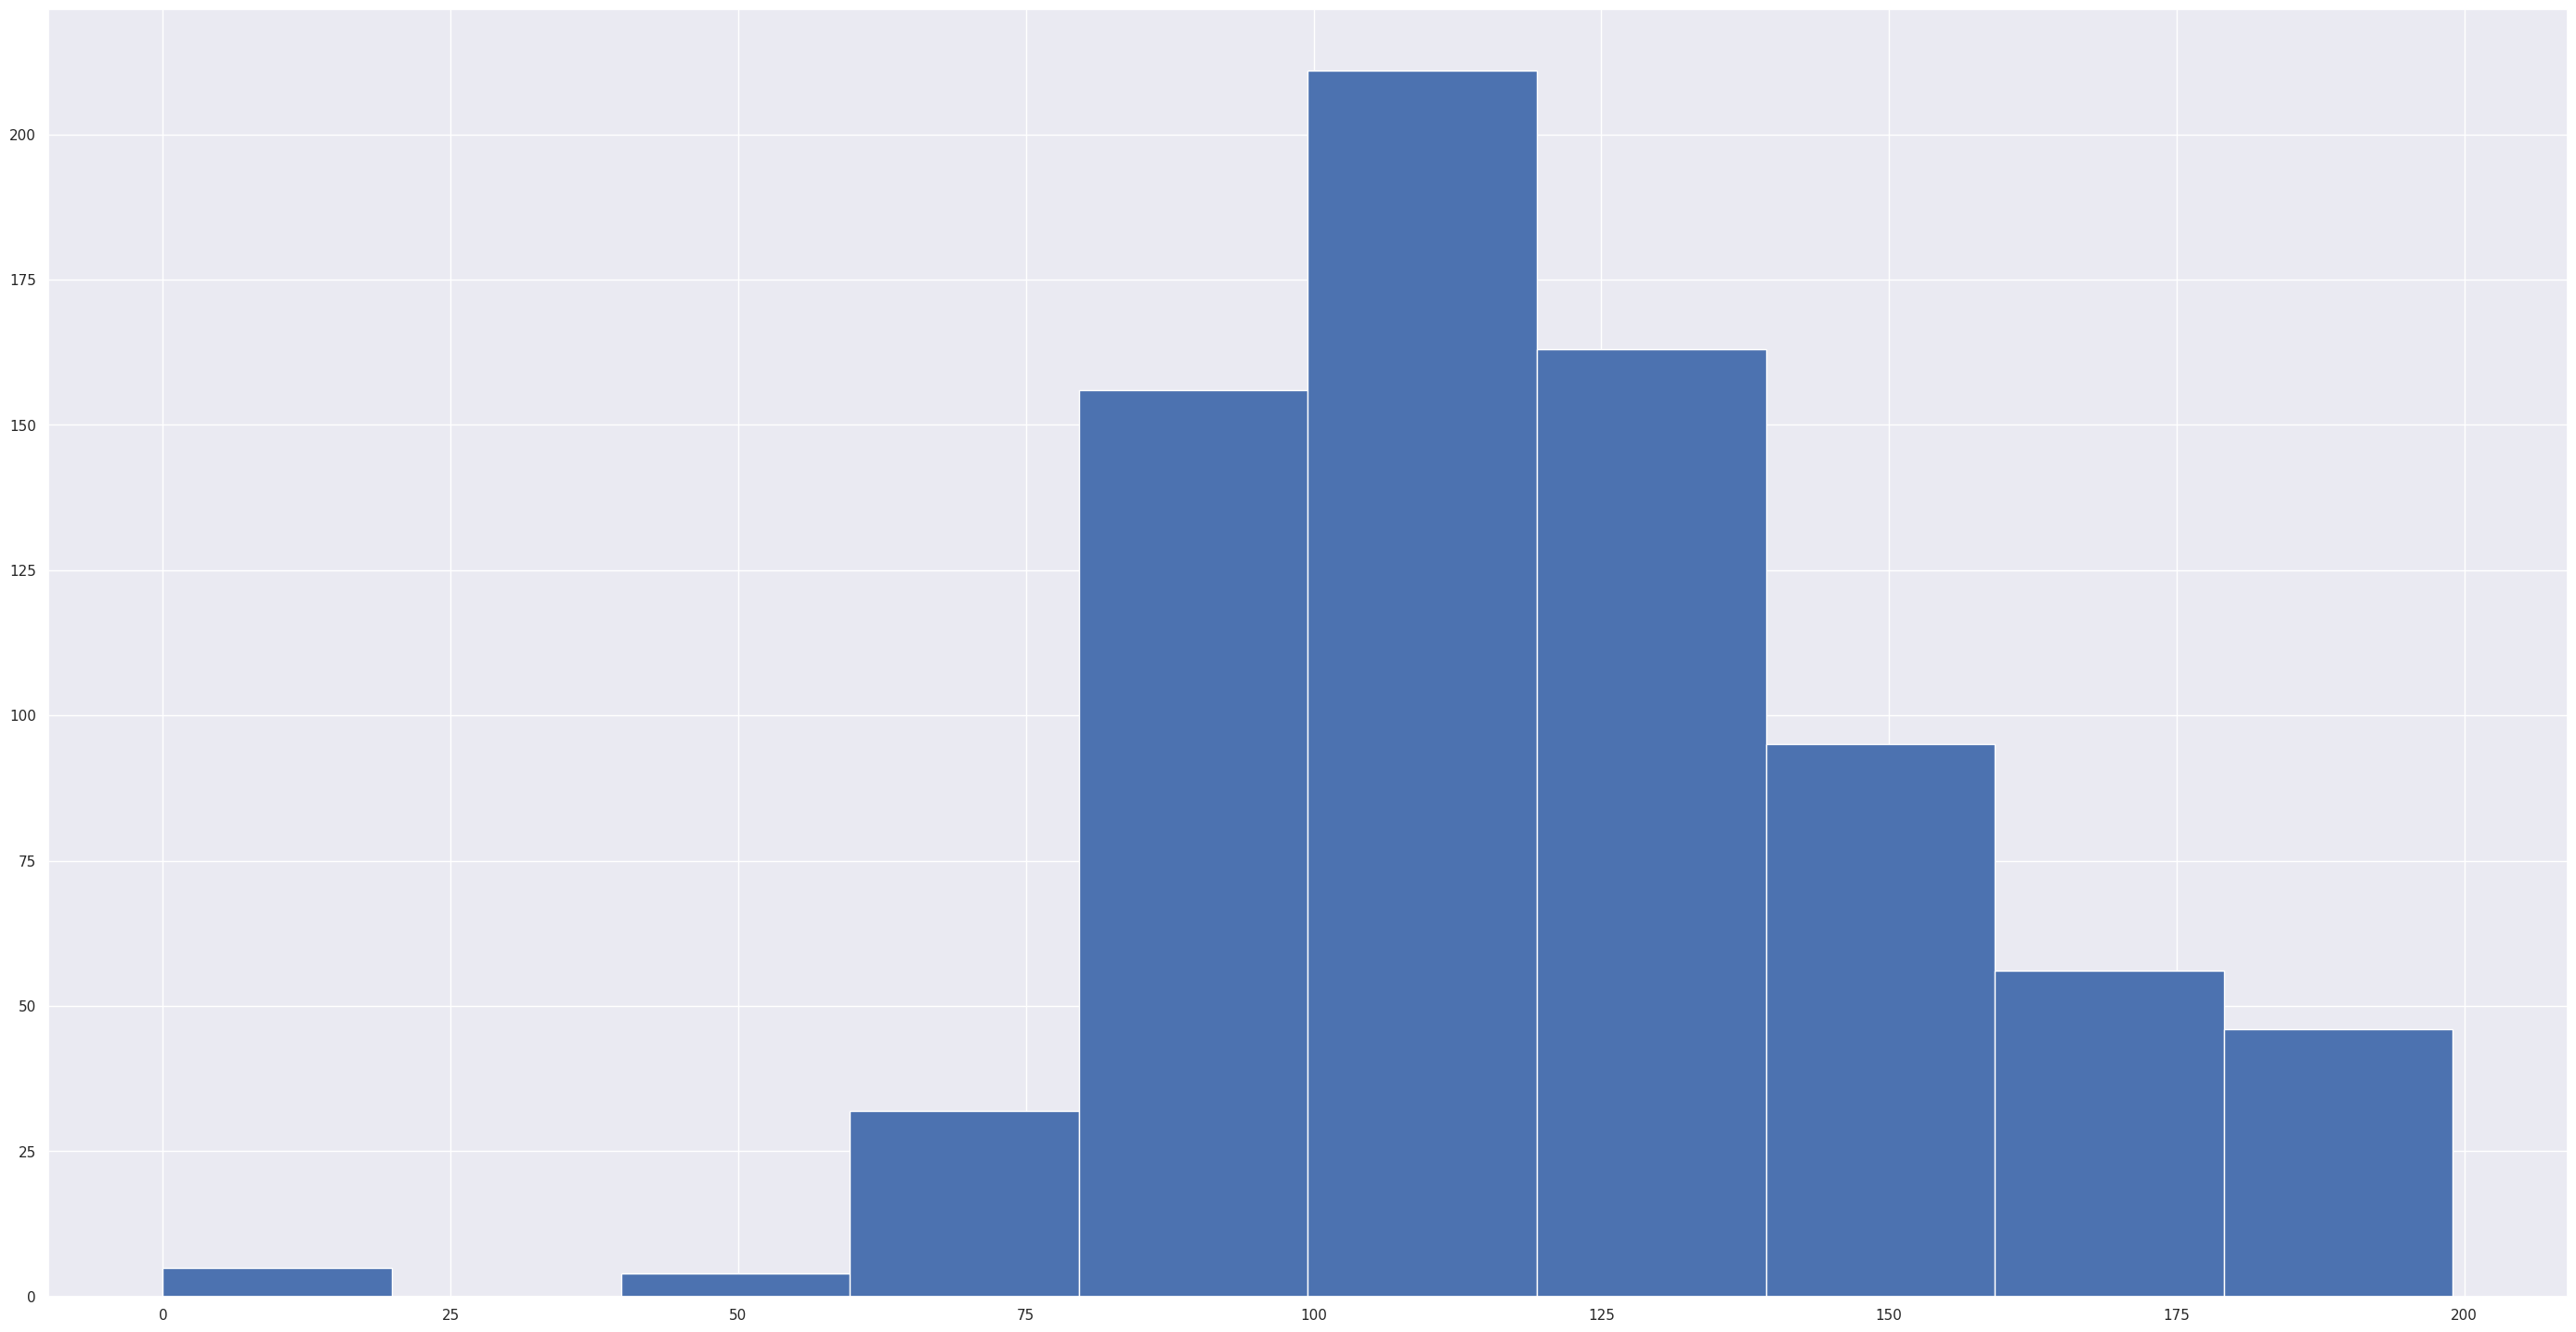

In [35]:
data["Glucose"].hist()

<AxesSubplot:>

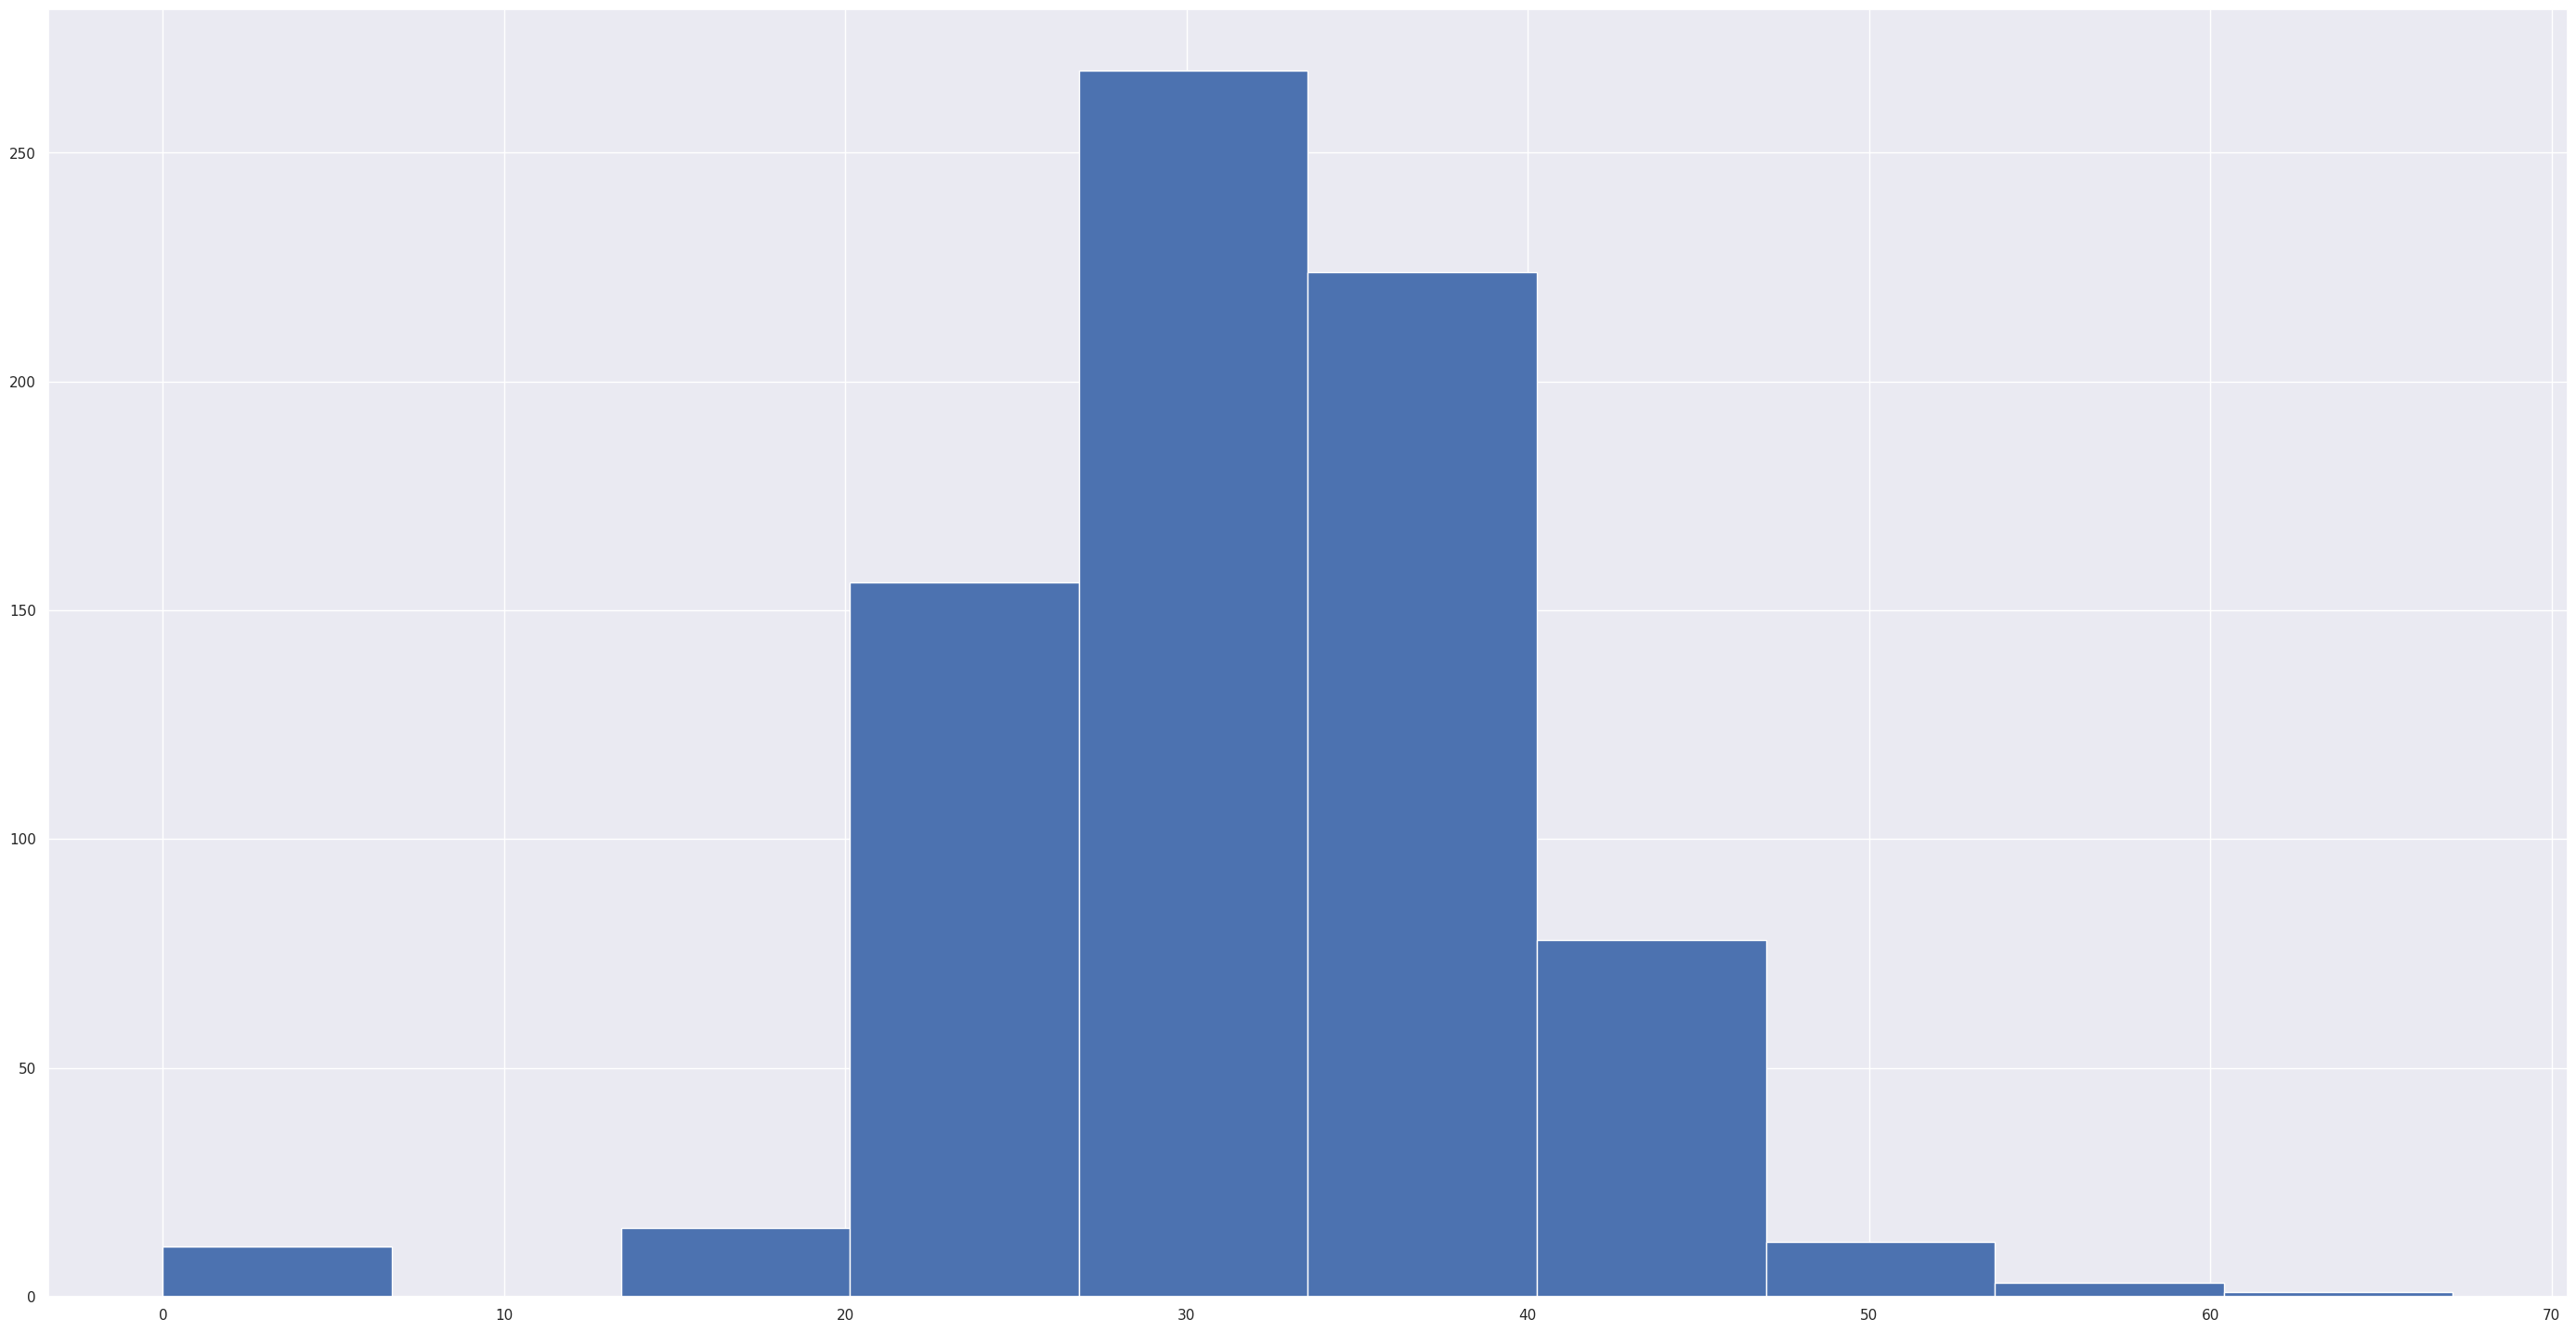

In [36]:
data["BMI"].hist()

<AxesSubplot:>

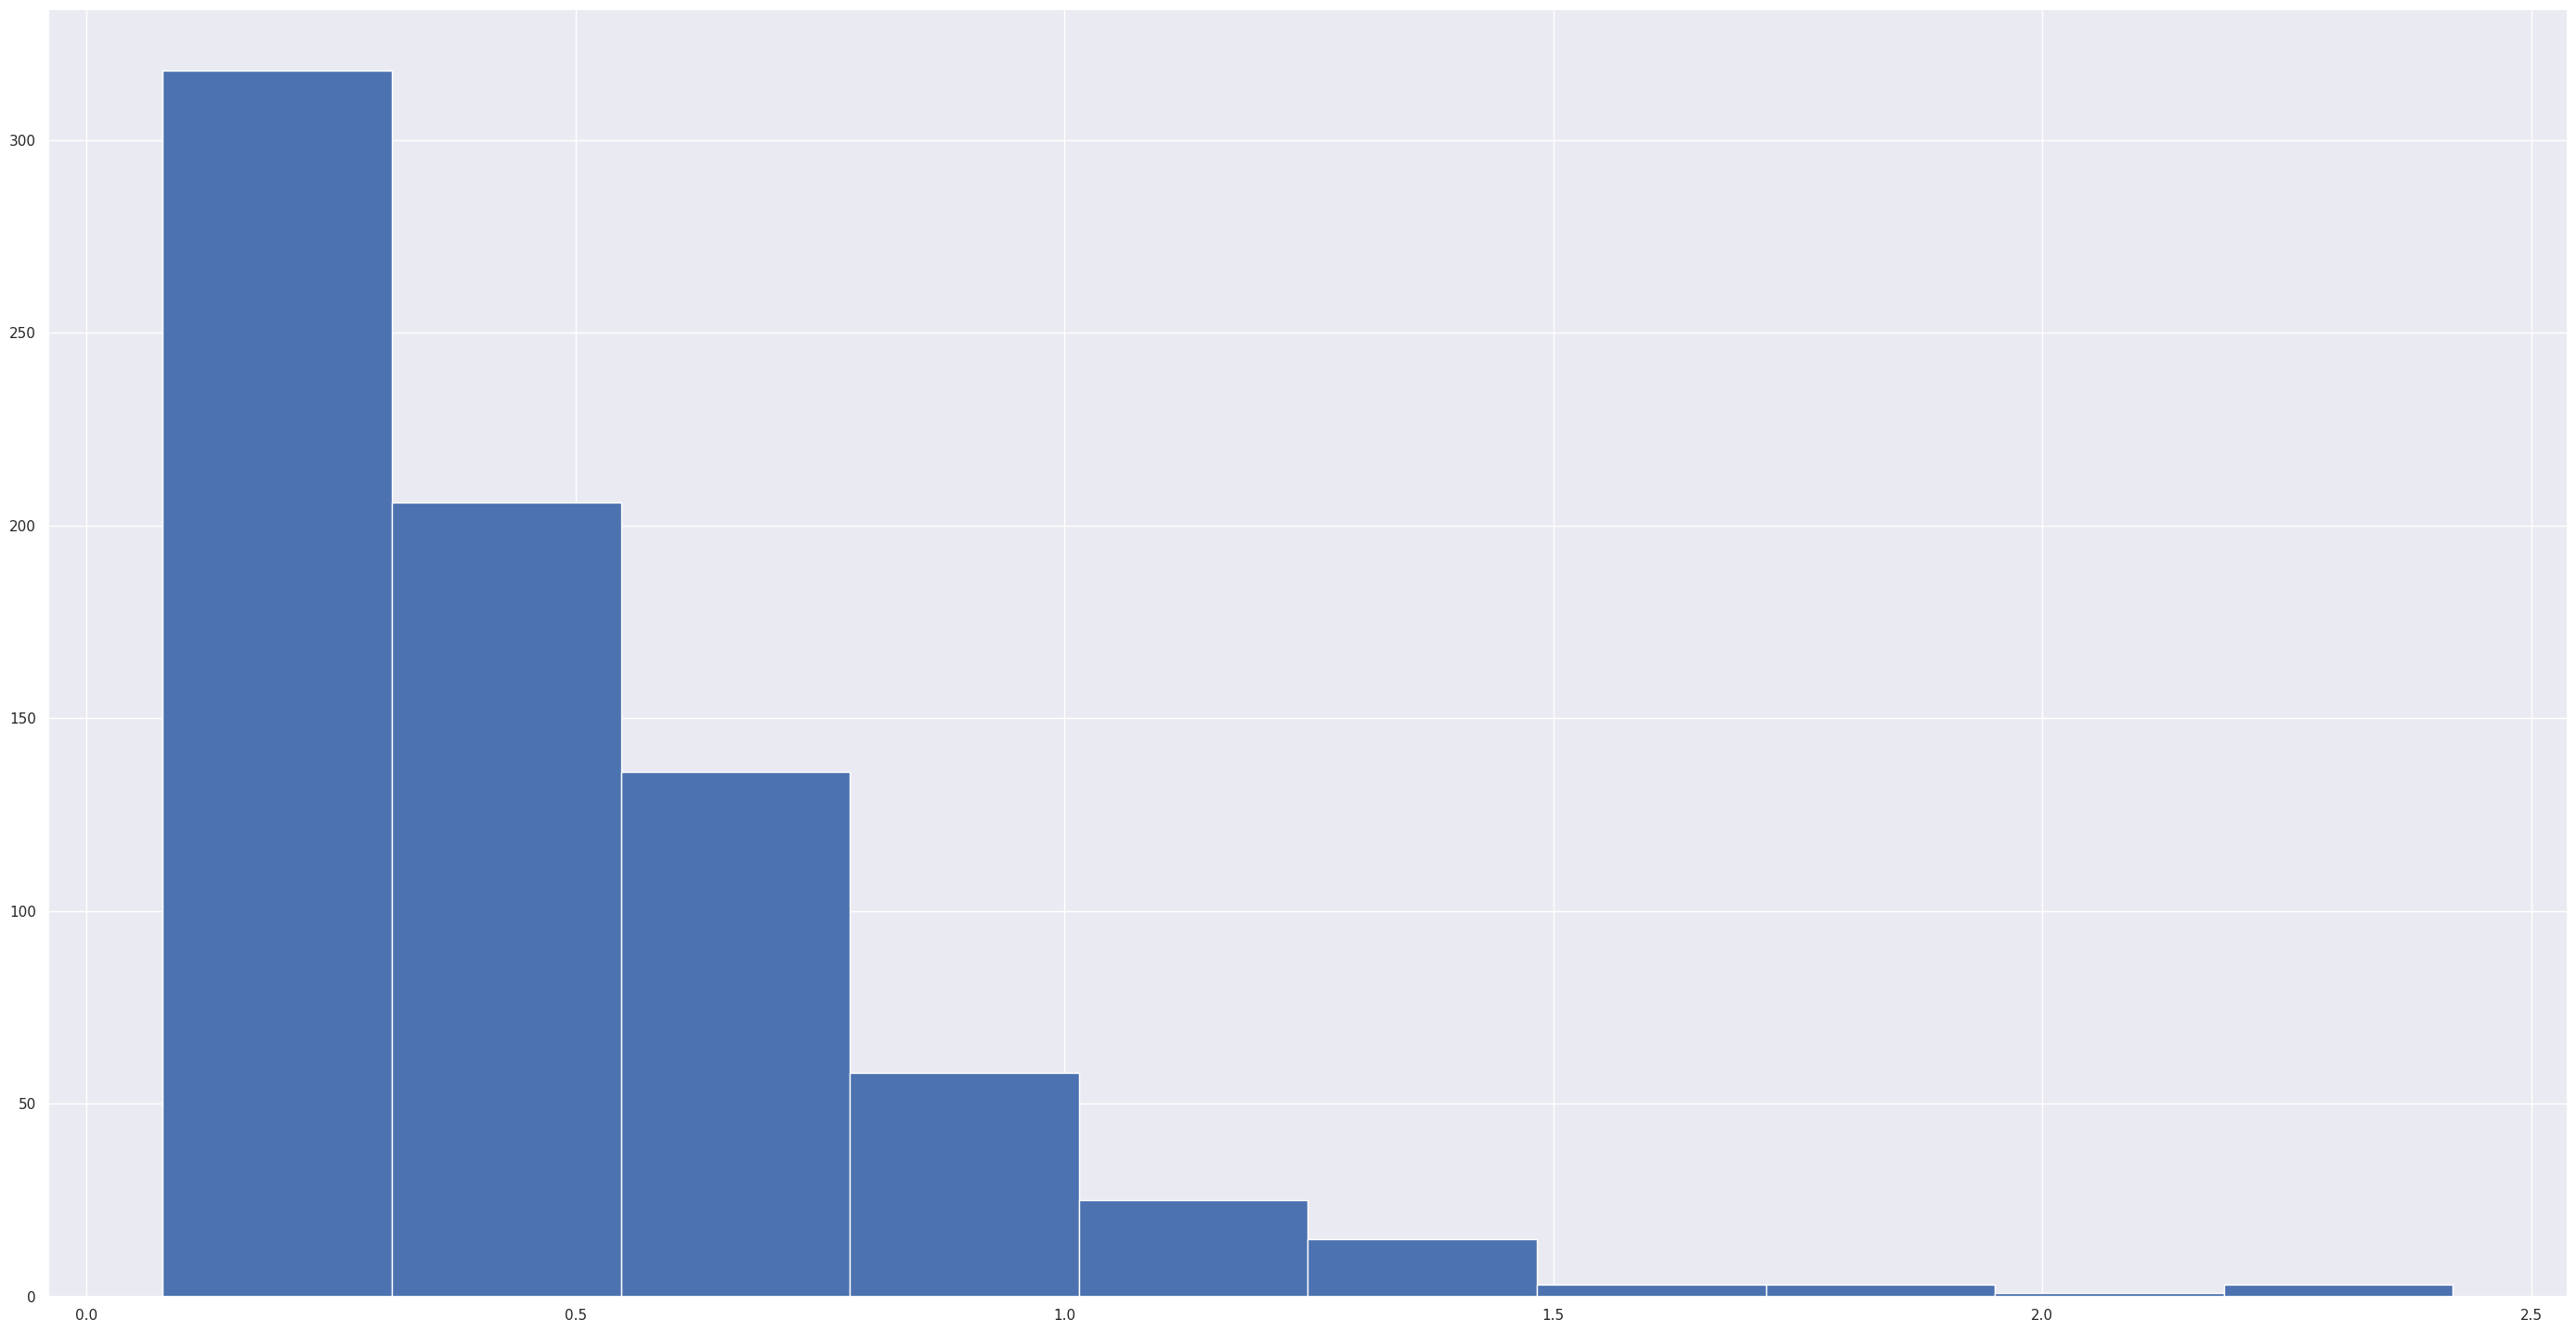

In [37]:
data["DiabetesPedigreeFunction"].hist()

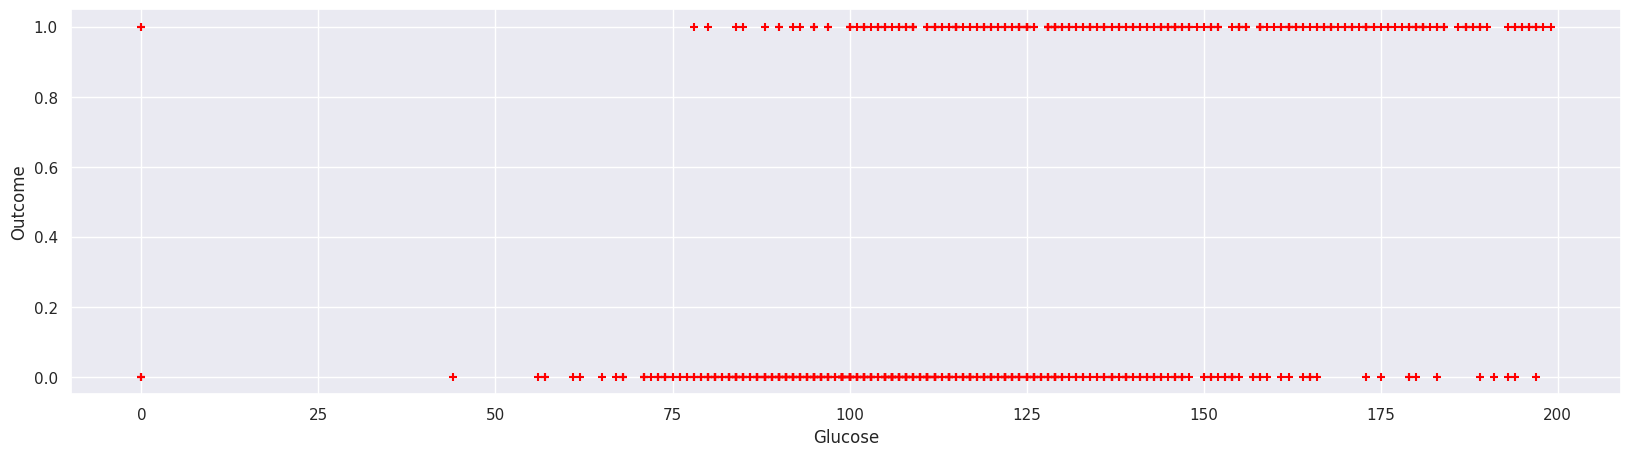

In [38]:
%matplotlib inline 
plt.figure(figsize=(20,5)) 
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.scatter(data["Glucose"],data["Outcome"],color='red',marker='+')

## Checking Accuracy with Inbuilt model

In [39]:
X = data[['Glucose']]
Y = data['Outcome']
data =data.sample(frac=1,random_state=13)
# Shuffle the dataset 
X_sample = X.sample(frac=1,random_state=13)
Y_sample = Y.sample(frac=1,random_state=13)
# Define a size for your train set size and splitting the data
size = int(0.8 * len(X))
train_set = data[:size]
test_set = data[size:] 
X_train = X_sample[:size]
Y_train = Y_sample[:size]
X_test = X_sample[size:]
Y_test = Y_sample[size:]
Y_pred = GaussianNB().fit(X_train, Y_train).predict(X_test)

In [40]:
print("Accuracy: {0}".format((Y_pred == Y_test).sum().astype(float) / len(Y_pred)*100))

Accuracy: 77.27272727272727


## Naive Bayes Model

In [41]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior=[]
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [42]:
def calculate_likelihood(df,feature_name,feature_val,Y,label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean,std = df[feature_name].mean(), df[feature_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feature_val-mean)**2/(2 *std**2)))
    return p_x_given_y

In [43]:
def naive_bayes_gaussian(df, X, Y):
    print(df.columns)
    features = list(df.columns)[:-1]
    print(features)
    prior = calculate_prior(df, Y) # calculate prior
    Y_pred = []
    for x in X: # loop over every data sample
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood(df, features[i], x[i], Y, labels[j]) # calculate likelihood
        post_prob = [1]*len(labels) # calculate posterior probability (numerator only)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred) 

## Naive Bayes model for one feature 

In [44]:
train_set = data[:size]
test_set = data[size:]
X_train = train_set.iloc[:,:-1].values
Y_train = train_set.iloc[:,-1].values
test_set=test_set[['Glucose','Outcome']]
X_test = test_set.iloc[:,:-1].values
Y_test = test_set.iloc[:,-1].values
train_set=train_set[['Glucose','Outcome']]
Y_pred=naive_bayes_gaussian(train_set,X_test,'Outcome')

Index(['Glucose', 'Outcome'], dtype='object')
['Glucose']


In [45]:
acc=((Y_pred==Y_test).sum().astype(float) / len(Y_pred)*100)
print(len(Y_pred))
print(len(Y_test))
print ('Accuracy: {0} %'.format(acc))

154
154
Accuracy: 77.27272727272727 %


## Naive Bayes model for all features

In [46]:
import warnings
warnings.filterwarnings( "ignore" )
data =data.sample(frac=1,random_state=142)
size = int(0.8* len(X))
train_set1 = data[:size]
test_set1= data[size:]
X_train1 = train_set1.iloc[:,:-1].values
Y_train1 = train_set1.iloc[:,-1].values
X_test1 = test_set1.iloc[:,:-1].values
Y_test1 = test_set1.iloc[:,-1].values
Y_pred1=naive_bayes_gaussian(train_set1,X_test1,'Outcome')

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [47]:
# print(Y_pred1.shape)
# print(Y_test1.shape)
# print(Y_pred1 == Y_test1)
acc=((Y_pred1 == Y_test1).sum().astype(float) / len(Y_pred1)*100)
# print(Y_pred1 == Y_test1)
# print(len(Y_pred1))
# print(len(Y_test))
print ('Accuracy: {0} %'.format(acc))

Accuracy: 77.92207792207793 %


## Naive Bayes model for few features

In [48]:
data =data.sample(frac=1,random_state=142)
train_set2 = data[:size]
test_set2 = data[size:]
X_train2= train_set2.iloc[:,:-1].values
Y_train2= train_set2.iloc[:,-1].values
train_set2=train_set2[['Age','Glucose','BMI','Outcome']]
test_set2=test_set2[['Age','Glucose','BMI','Outcome']]
X_test2= test_set2.iloc[:,:-1].values
Y_test2= test_set2.iloc[:,-1].values
train_set2=train_set2[['Age','Glucose','BMI','Outcome']]
Y_pred2=naive_bayes_gaussian(train_set,X_test2,'Outcome')

Index(['Glucose', 'Outcome'], dtype='object')
['Glucose']


In [49]:
acc=((Y_pred2 == Y_test2).sum().astype(float) / len(Y_pred2)*100)
# print(Y_pred2 == Y_test2)
print ('Accuracy : {0} %'.format(acc))

Accuracy : 62.33766233766234 %
